# EDA

In [1]:
from function import *

---

### 1. Overall information

In [2]:
# load data

test = pd.read_csv('data/coupon_list_test.csv', index_col = 0)

---

### 2. Preprocessing

: 편의를 위해 전처리 후 EDA 실시

#### 2.1 valid 관련

In [8]:
valid_list = ['VALIDFROM', 'VALIDEND', 'VALIDPERIOD']

train[valid_list].tail()

,VALIDFROM,VALIDEND,VALIDPERIOD
19408,2011-07-18,2011-12-30,165.0
19409,2011-10-04,2012-02-29,148.0
19410,2011-09-06,2011-11-30,85.0
19411,2011-07-18,2011-10-31,105.0
19412,2011-07-27,2011-11-30,126.0


#### Note :
1. VALIDEND - VALIDFROM = VALIDPERIOD
2. 세 변수는 다중공선성이 높을것으로 예상
3. VALIDPERIOD의 NAN값만 처리하고 이 컬럼만 변수로 사용
4. NAN값은 평균으로 대체

In [3]:

test['VALIDPERIOD'] = test['VALIDPERIOD'].fillna(round(test['VALIDPERIOD'].mean(), 1))
print(test['VALIDPERIOD'].isnull().any()) # test

False


#### 2.2 date 관련

In [5]:
date_list = ['USABLE_DATE_MON', 'USABLE_DATE_TUE', 'USABLE_DATE_WED', 
            'USABLE_DATE_THU', 'USABLE_DATE_FRI', 'USABLE_DATE_SAT', 
            'USABLE_DATE_SUN', 'USABLE_DATE_HOLIDAY', 'USABLE_DATE_BEFORE_HOLIDAY']

test[date_list].tail()

,USABLE_DATE_MON,USABLE_DATE_TUE,USABLE_DATE_WED,USABLE_DATE_THU,USABLE_DATE_FRI,USABLE_DATE_SAT,USABLE_DATE_SUN,USABLE_DATE_HOLIDAY,USABLE_DATE_BEFORE_HOLIDAY
305,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
306,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
307,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
308,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0
309,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


#### Note :
1. NAN값이 행 전체가 없는것을 확인
2. 7000개 이상인 것으로 보아 사용이 불가능한 것이 아닌 모든 요일에 사용 가능한것으로 추측
3. NAN값을 1로 대체
4. 2인 값도 사용 가능한것을 잘못 표기한것으로 추측
4. 2인 값도 1로 대체

In [6]:
for i in range(11, 19+1) :
    
    
    # test
    test[test.columns[i]] = test[test.columns[i]].fillna(1) # NAN값 1로 대체
    test[test.columns[i]] = test[test.columns[i]].replace(2, 1) # 2를 1로 변경
    
print(test[date_list].isnull().any())

USABLE_DATE_MON               False
USABLE_DATE_TUE               False
USABLE_DATE_WED               False
USABLE_DATE_THU               False
USABLE_DATE_FRI               False
USABLE_DATE_SAT               False
USABLE_DATE_SUN               False
USABLE_DATE_HOLIDAY           False
USABLE_DATE_BEFORE_HOLIDAY    False
dtype: bool


In [7]:
print('train unique 갯수 :')
for i in range(11, 19+1):
    
    print('{} : {}개'.format(test.columns[i], len(set(test[test.columns[i]]))))

train unique 갯수 :
USABLE_DATE_MON : 2개
USABLE_DATE_TUE : 2개
USABLE_DATE_WED : 2개
USABLE_DATE_THU : 2개
USABLE_DATE_FRI : 2개
USABLE_DATE_SAT : 2개
USABLE_DATE_SUN : 2개
USABLE_DATE_HOLIDAY : 2개
USABLE_DATE_BEFORE_HOLIDAY : 2개


---

### 3. X data

In [8]:
# EDA를 편하게 하기 위해 type별 정렬
category = ['CAPSULE_TEXT', 'GENRE_NAME', 'USABLE_DATE_MON', 'USABLE_DATE_TUE',
            'USABLE_DATE_WED', 'USABLE_DATE_THU', 'USABLE_DATE_FRI',
            'USABLE_DATE_SAT', 'USABLE_DATE_SUN', 'USABLE_DATE_HOLIDAY',
            'USABLE_DATE_BEFORE_HOLIDAY', 'large_area_name', 'ken_name', 'small_area_name',]
continuous = ['PRICE_RATE', 'CATALOG_PRICE', 'DISCOUNT_PRICE', 
              'DISPPERIOD', 'VALIDPERIOD',]
date = ['DISPFROM', 'DISPEND']
coupon_id = ['COUPON_ID_hash']

# train data
test = pd.concat([test[category], test[continuous], test[date], test[coupon_id]], axis = 1)

#### 3.1 Category

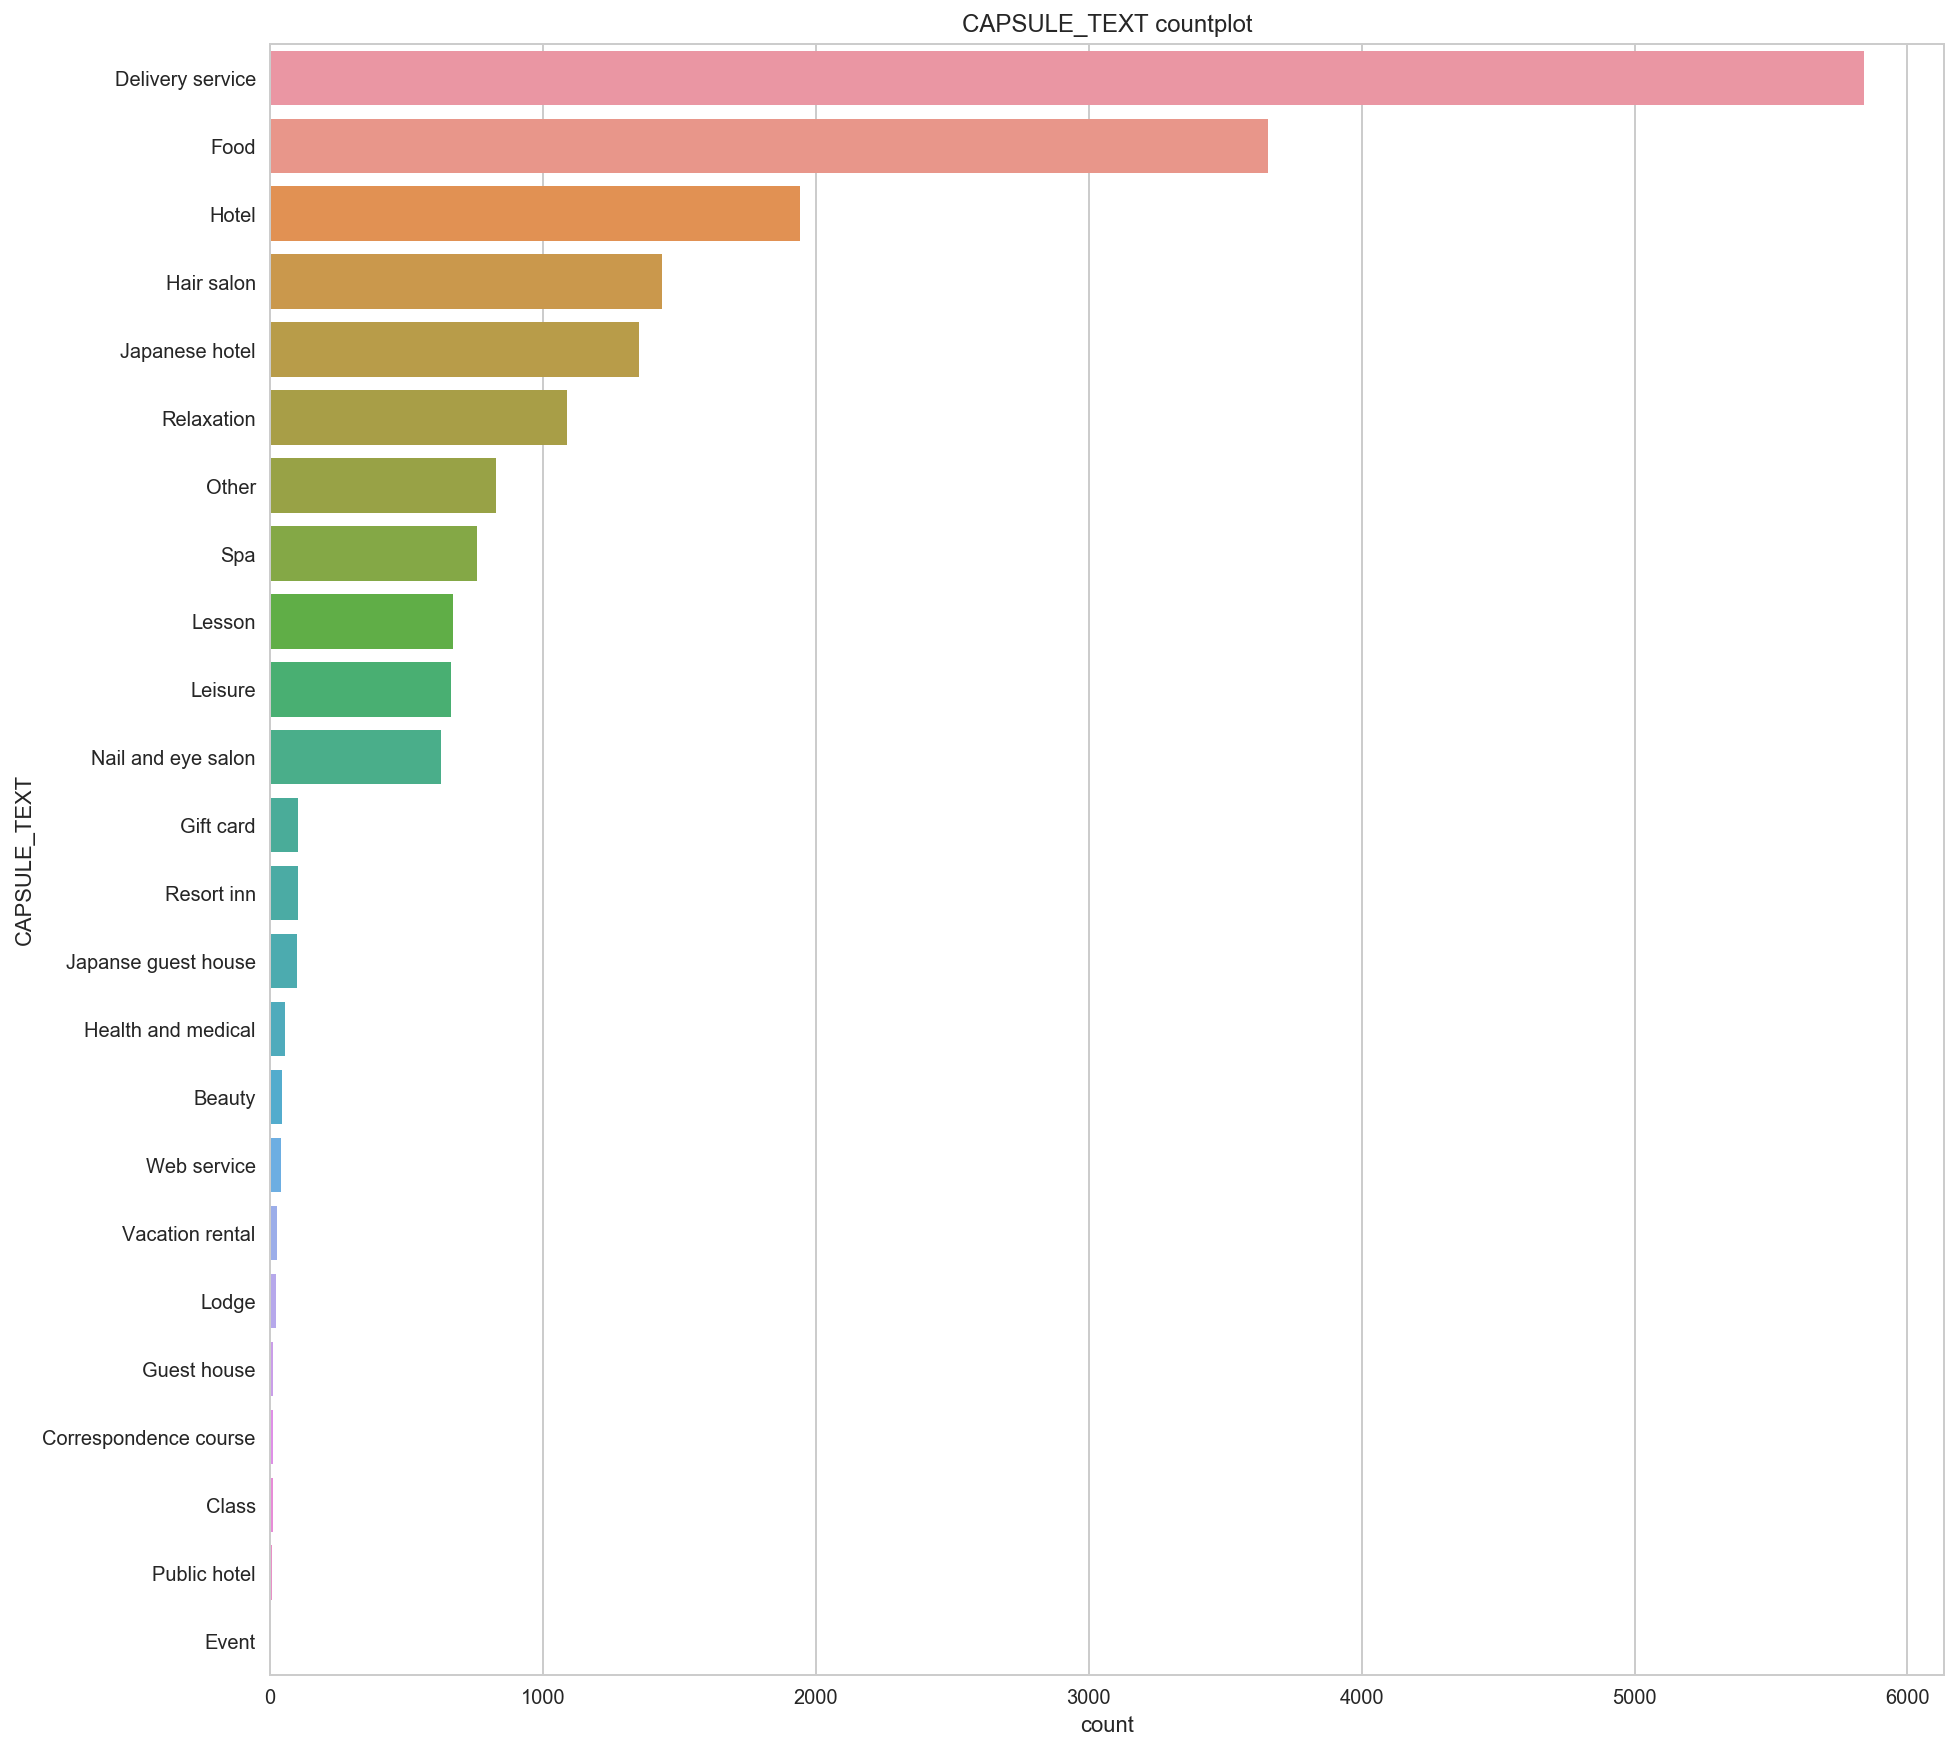

In [14]:
# CAPSULE_TEXT countplot
plt.figure(figsize=(15, 15))
sns.countplot(y = 'CAPSULE_TEXT', data = train, order = train['CAPSULE_TEXT'].value_counts().index)
plt.title('CAPSULE_TEXT countplot')
plt.show()

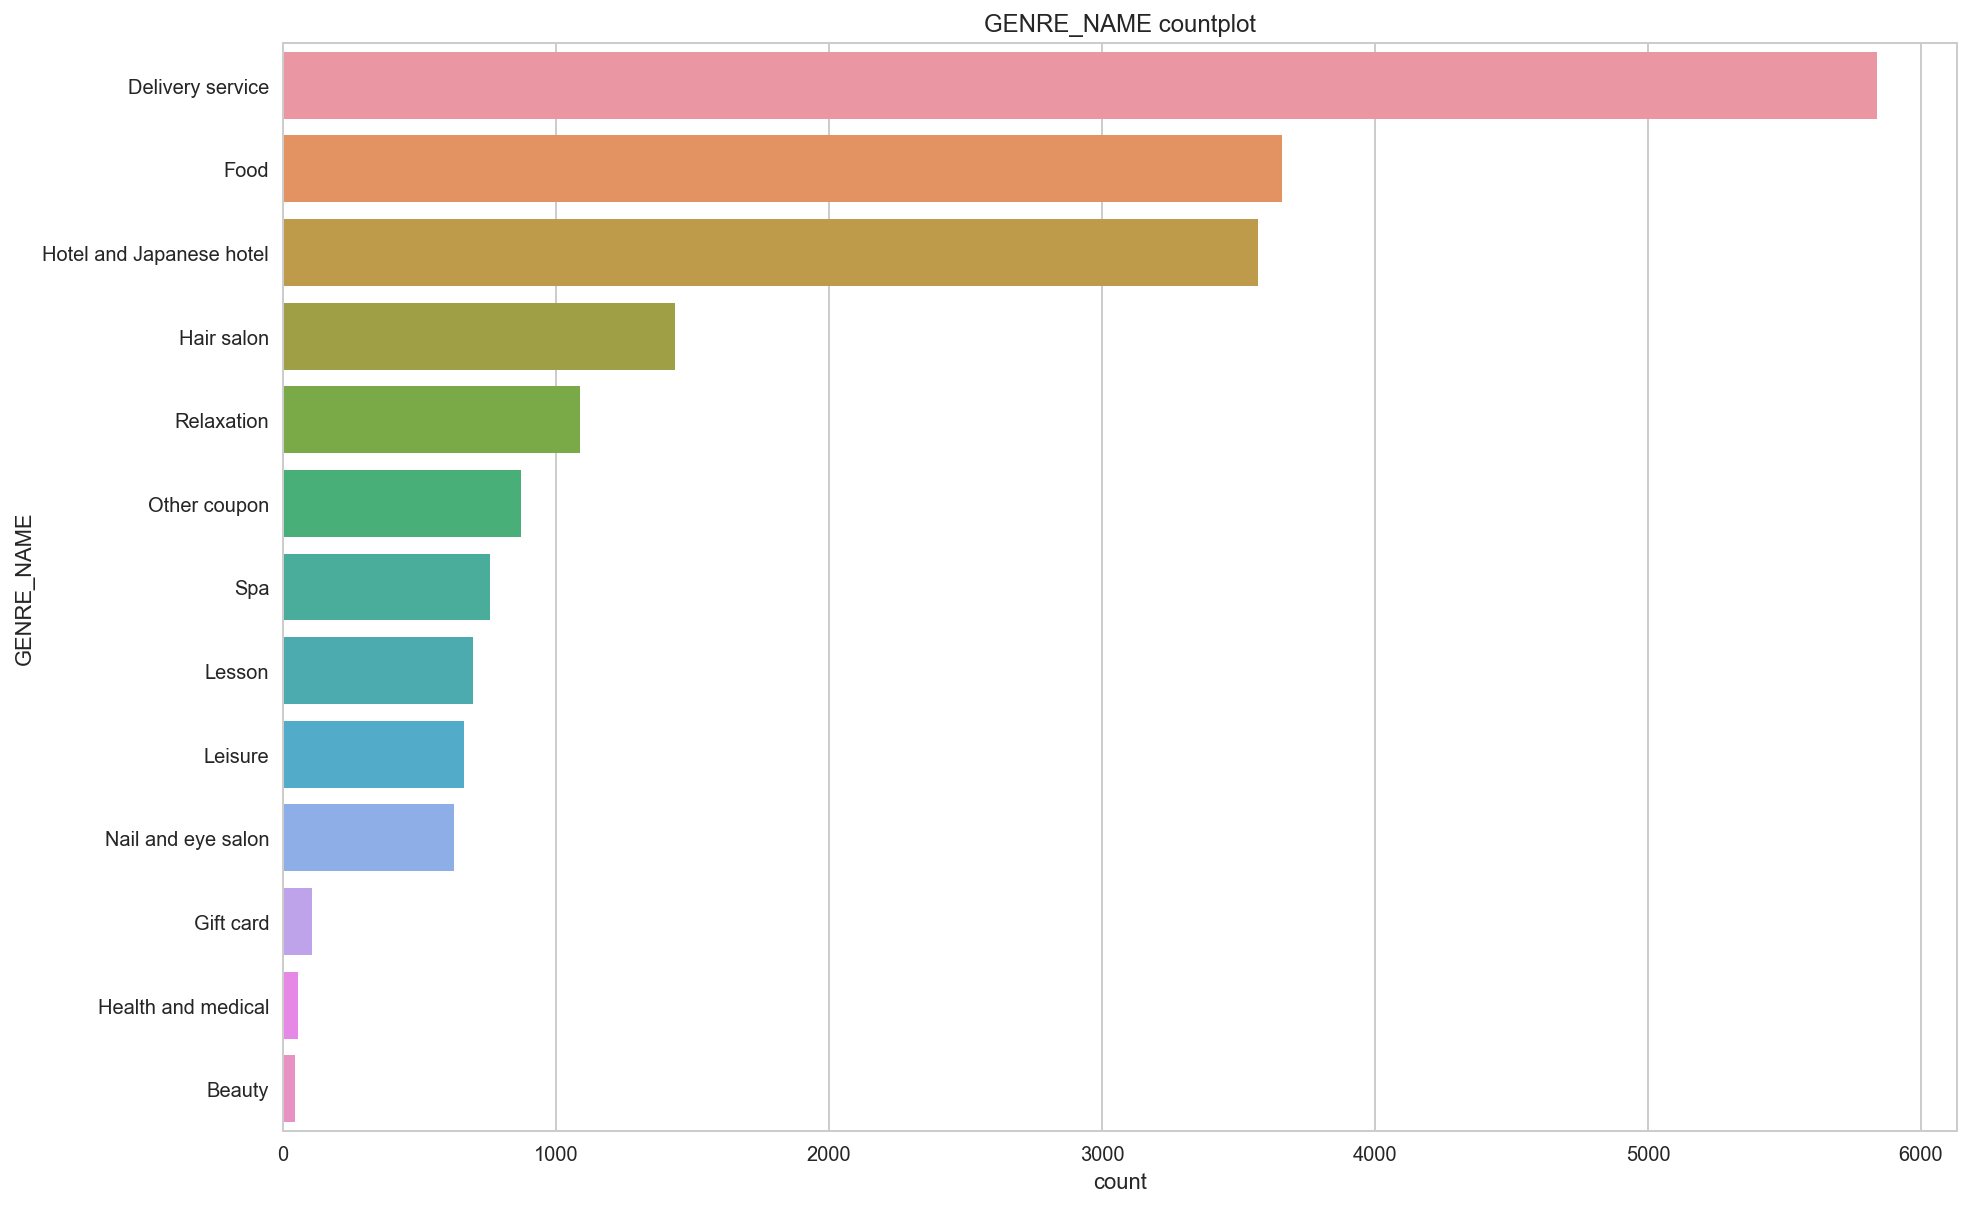

In [15]:
# CAPSULE_TEXT countplot
plt.figure(figsize=(15, 10))
sns.countplot(y = 'GENRE_NAME', data = train, order = train['GENRE_NAME'].value_counts().index)
plt.title('GENRE_NAME countplot')
plt.show()

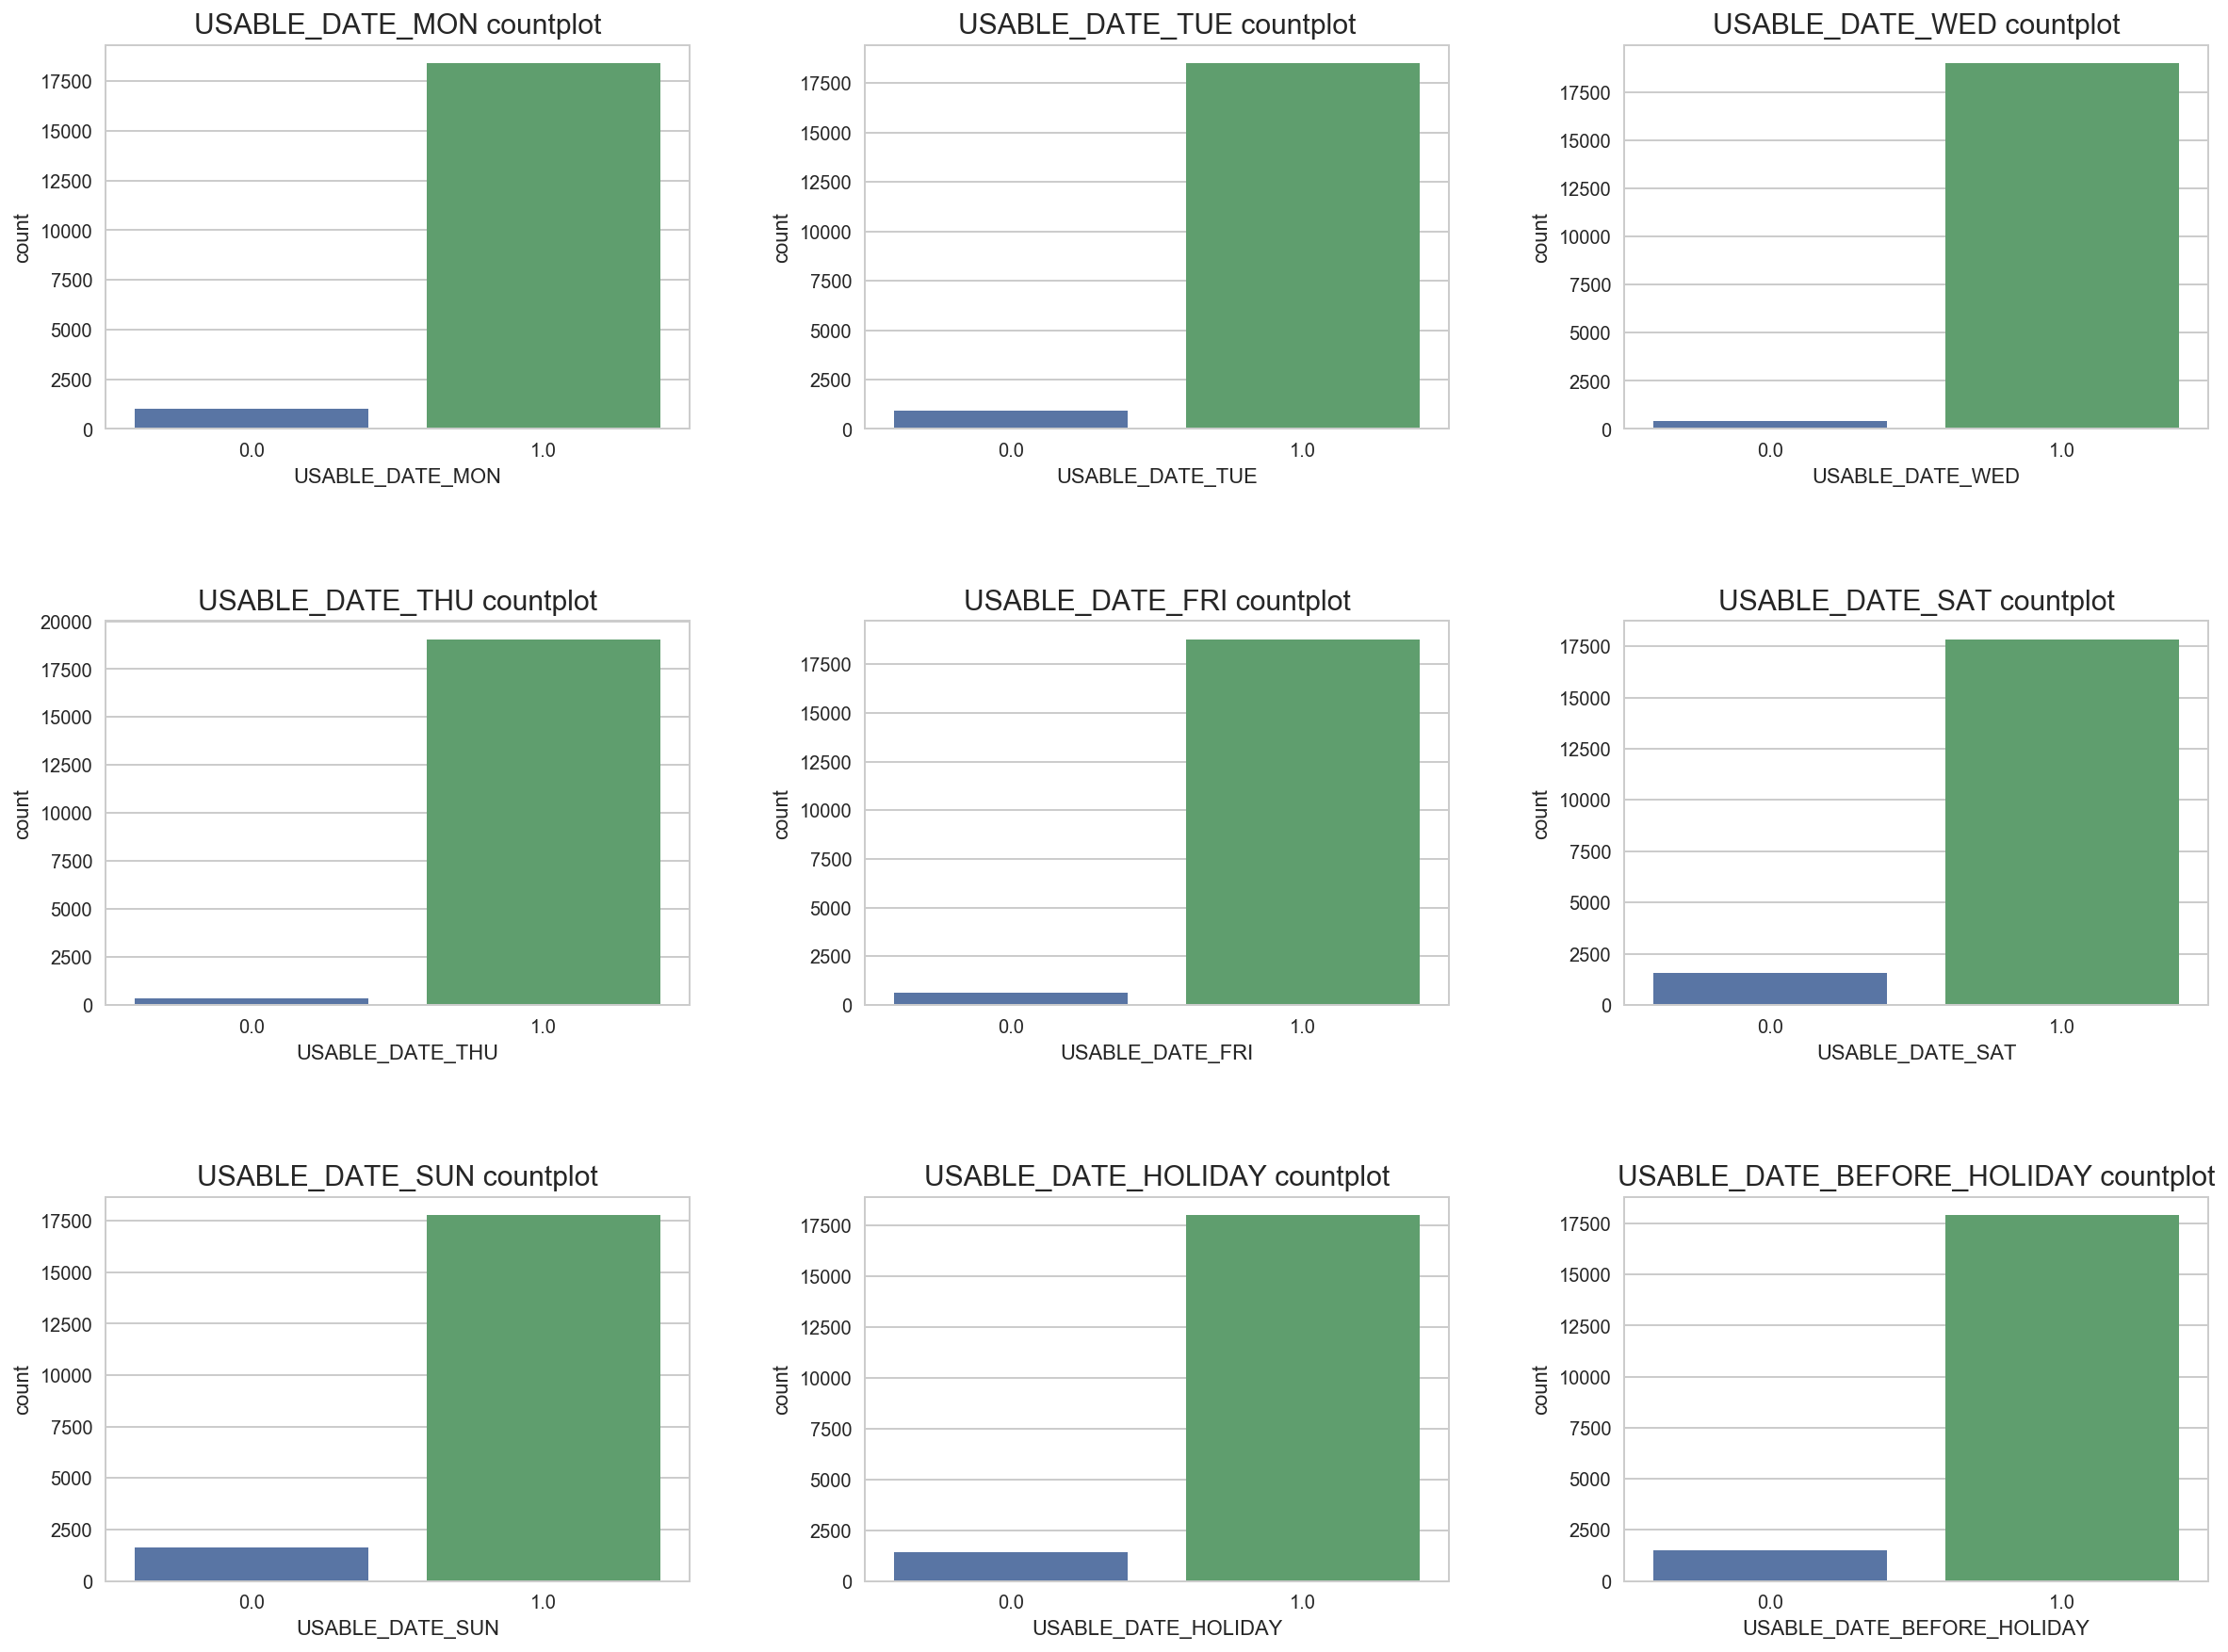

In [16]:
# USABLE_DATE countplot
plt.figure(figsize=(20, 15))
plt.subplots_adjust(hspace = 0.5, wspace = 0.3)

for i in range(2, 10+1):
    plt.subplot(3,3,i-1)
    sns.countplot(x = train.columns[i], data = train)
    plt.title("{} countplot".format(train.columns[i]), fontsize = 15)

plt.show()

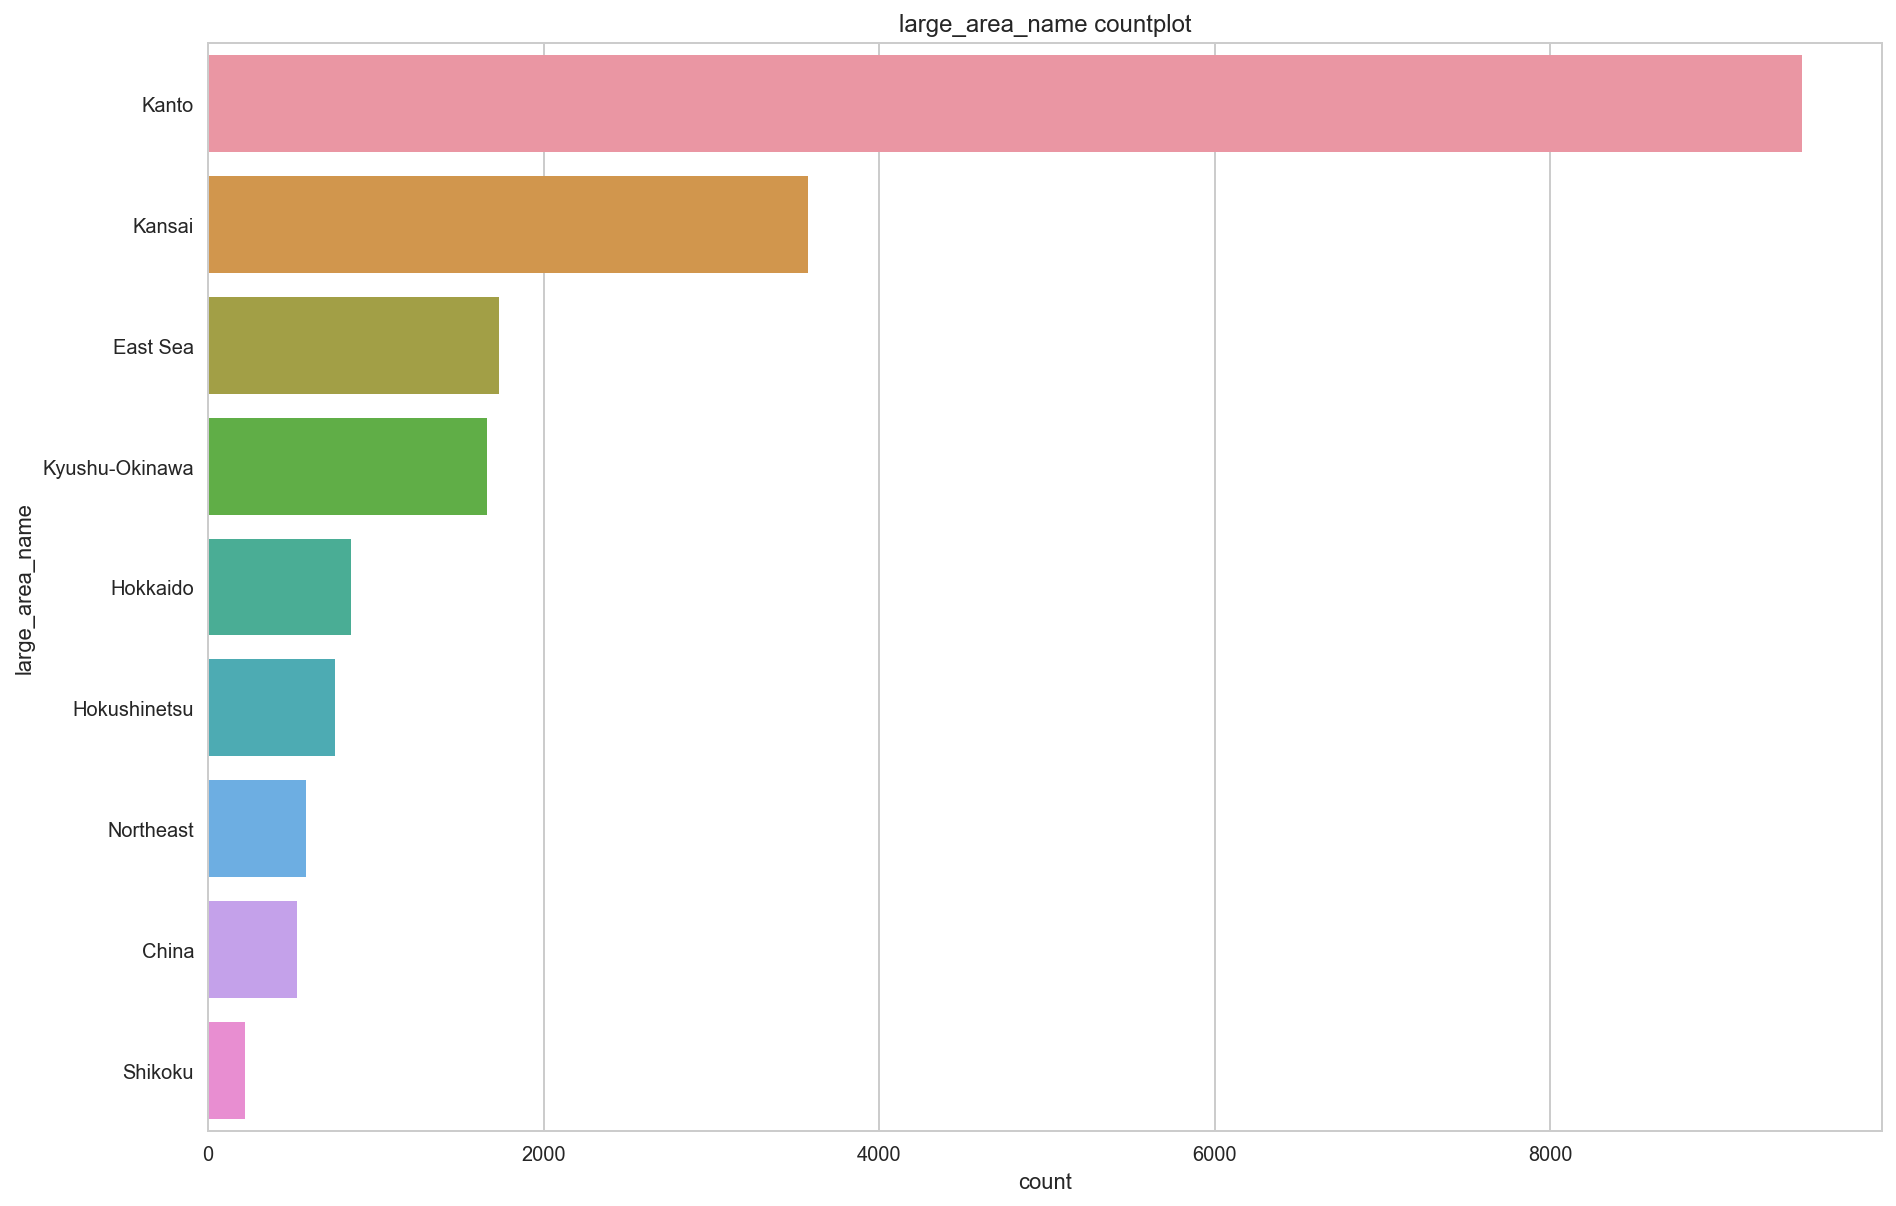

In [17]:
# large_area_name countplot
plt.figure(figsize=(15, 10))
sns.countplot(y = 'large_area_name', data = train, order = train['large_area_name'].value_counts().index)
plt.title('large_area_name countplot')
plt.show()

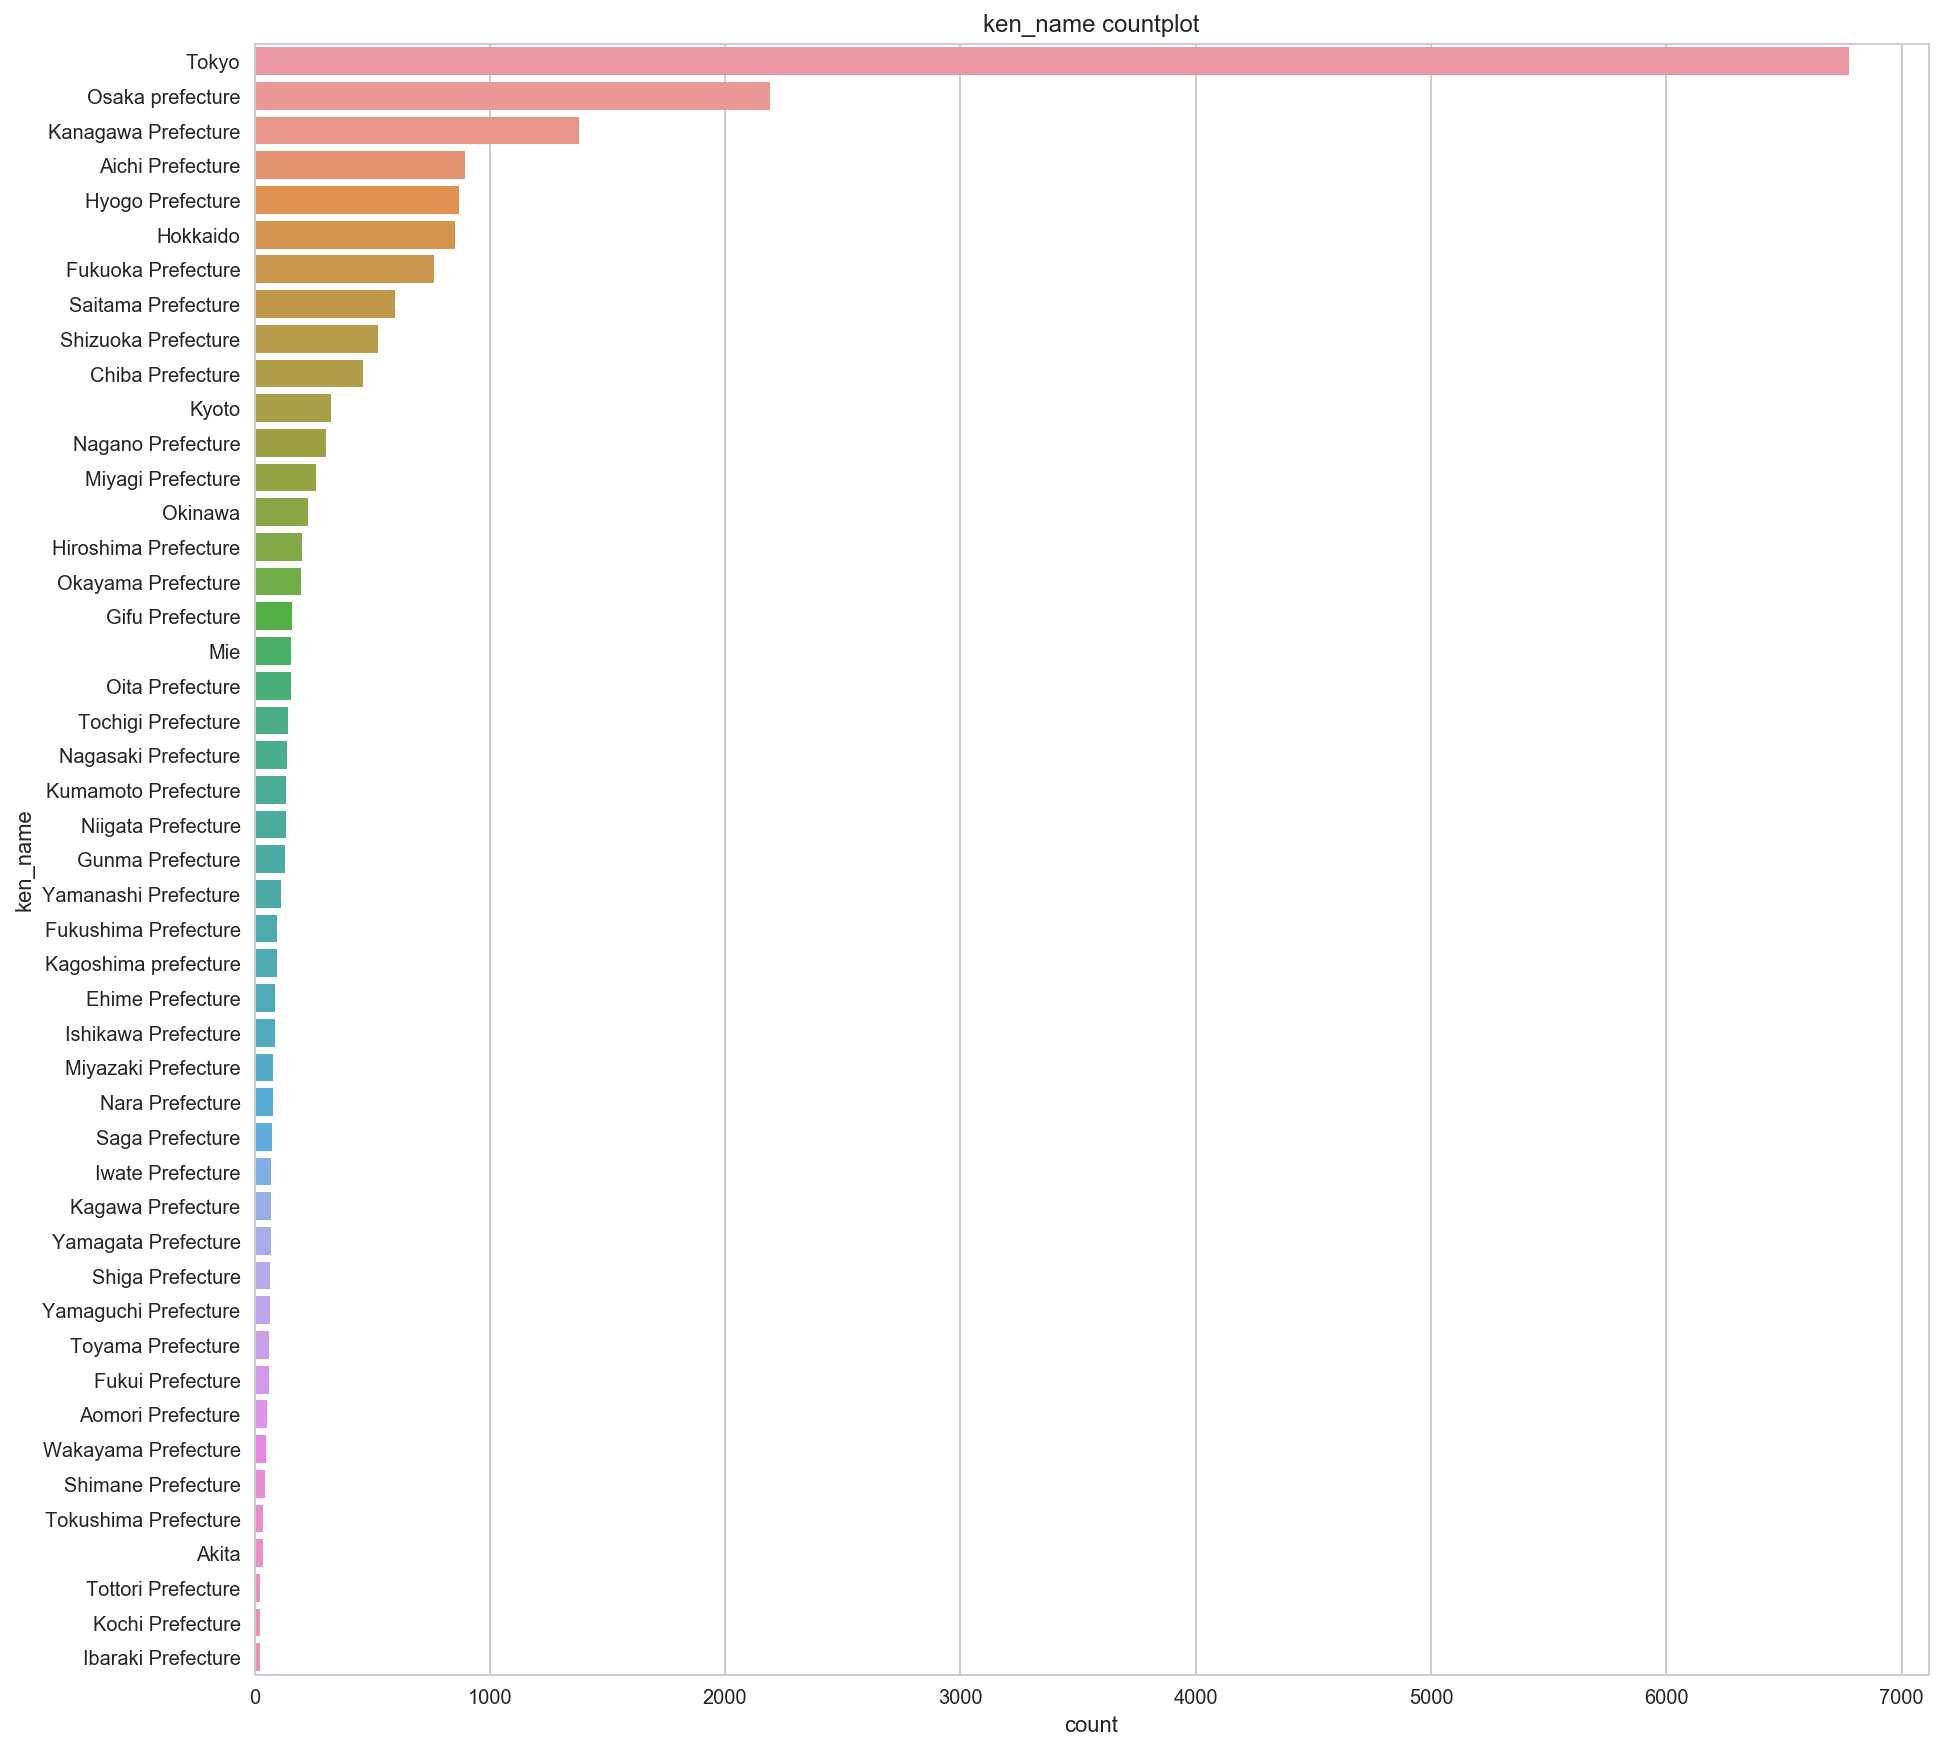

In [18]:
# ken_name countplot
plt.figure(figsize=(15, 15))
sns.countplot(y = 'ken_name', data = train, order = train['ken_name'].value_counts().index)
plt.title('ken_name countplot')
plt.show()

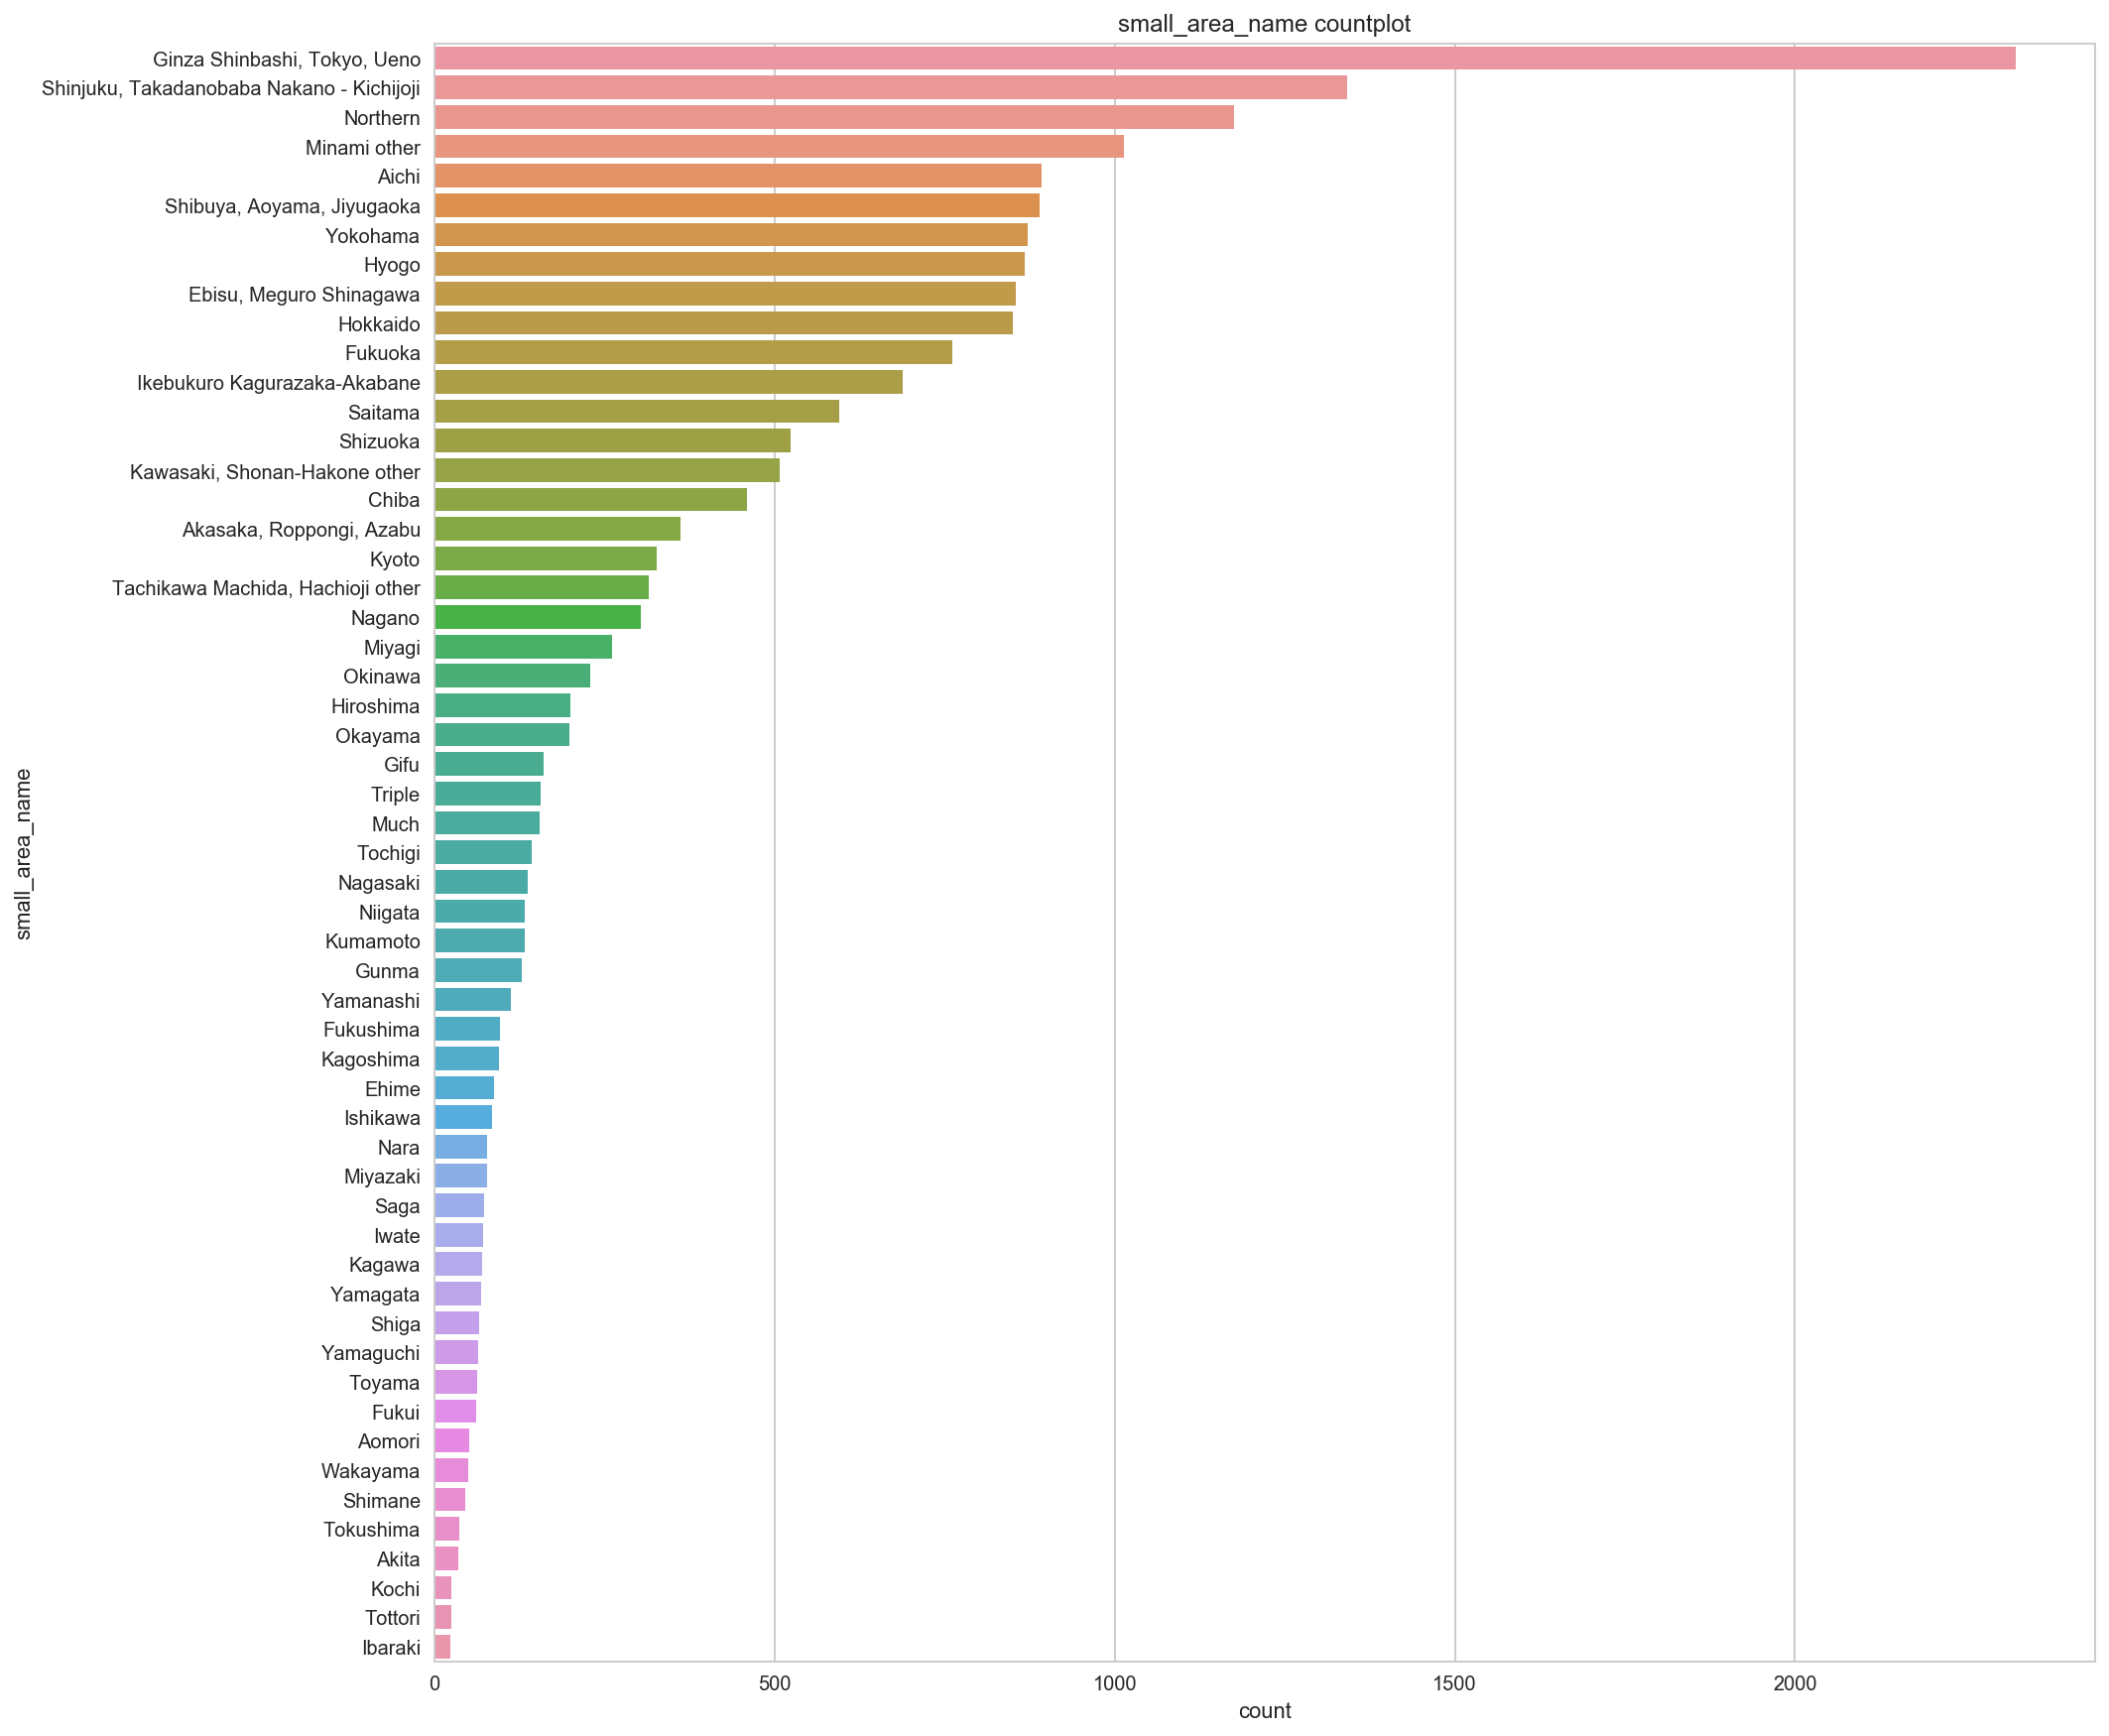

In [19]:
# small_area_name countplot
plt.figure(figsize=(15, 15))
sns.countplot(y = 'small_area_name', data = train, order = train['small_area_name'].value_counts().index)
plt.title('small_area_name countplot')
plt.show()

#### 3.2 Continuous

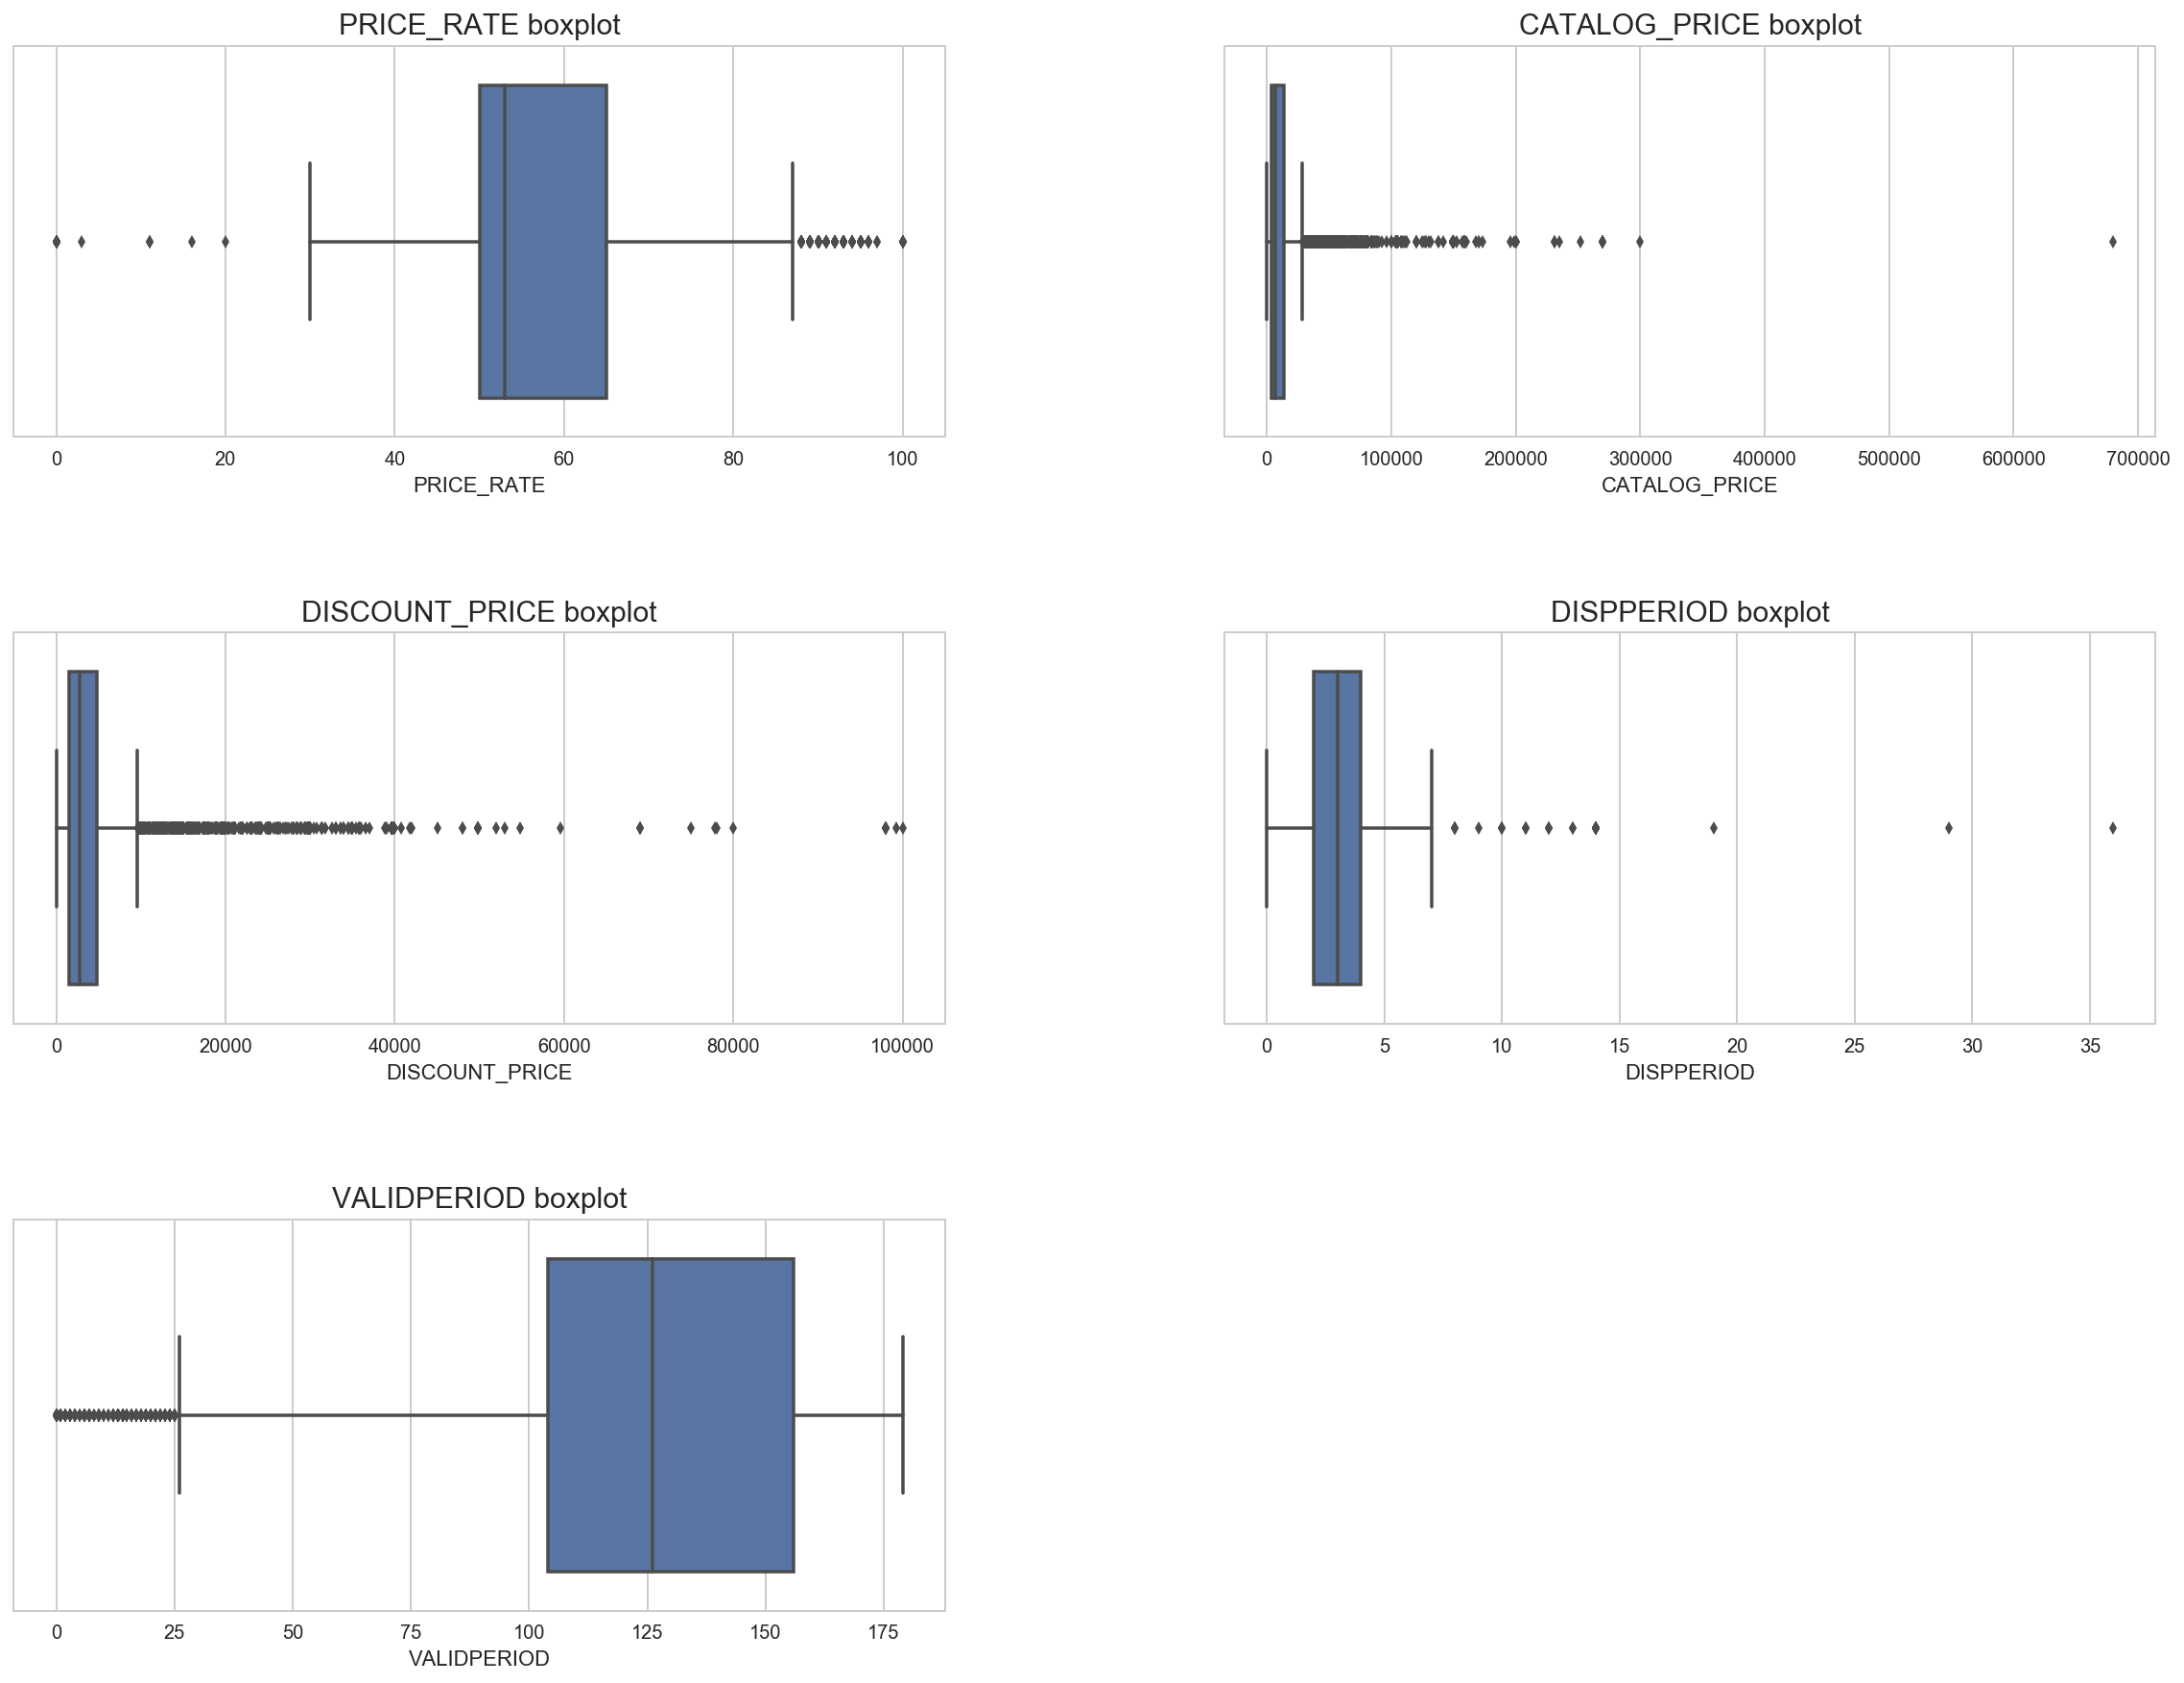

In [22]:
# USABLE_DATE boxplot
plt.figure(figsize=(20, 15))
plt.subplots_adjust(hspace = 0.5, wspace = 0.3)

for i in range(14, 18+1):
    plt.subplot(3,2,i-13)
    sns.boxplot(x = train.columns[i], data = train)
    plt.title("{} boxplot".format(train.columns[i]), fontsize = 15)

plt.show()

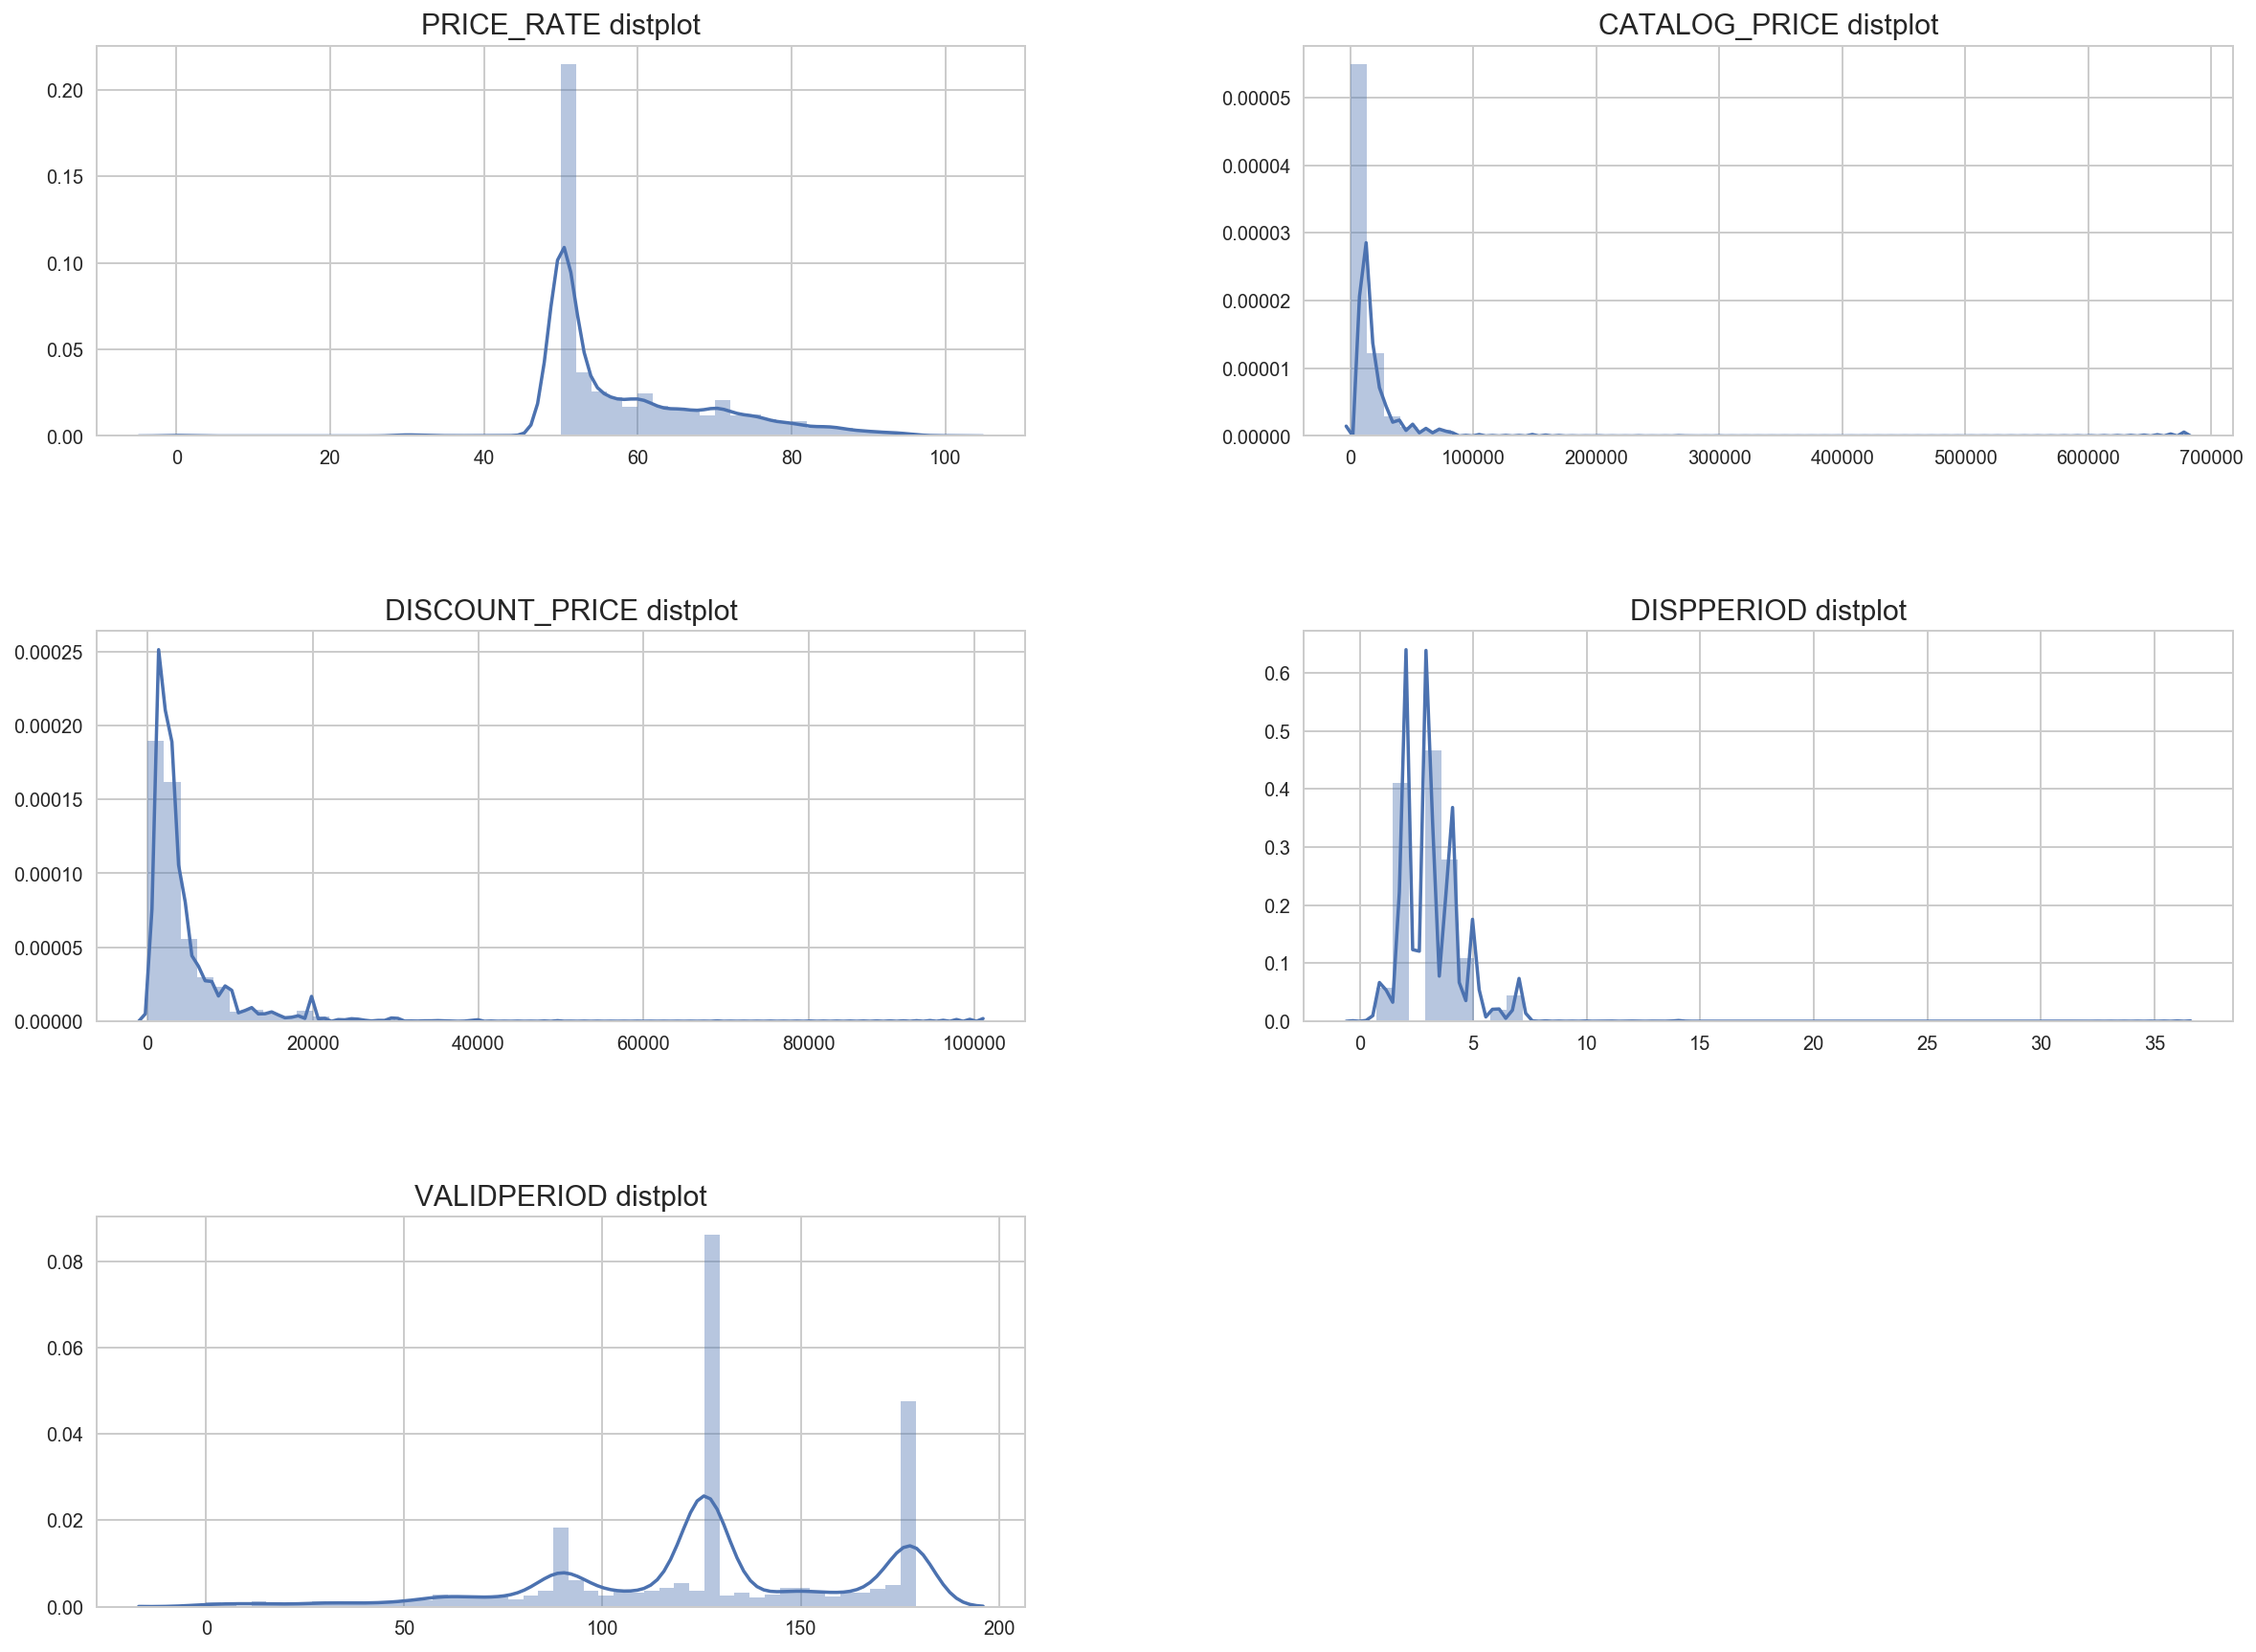

In [36]:
# USABLE_DATE distplot
plt.figure(figsize=(20, 15))
plt.subplots_adjust(hspace = 0.5, wspace = 0.3)

for i in range(14, 18+1):
    plt.subplot(3,2,i-13)
    sns.distplot(train[train.columns[i]].values)
    plt.title("{} distplot".format(train.columns[i]), fontsize = 15)

plt.show()

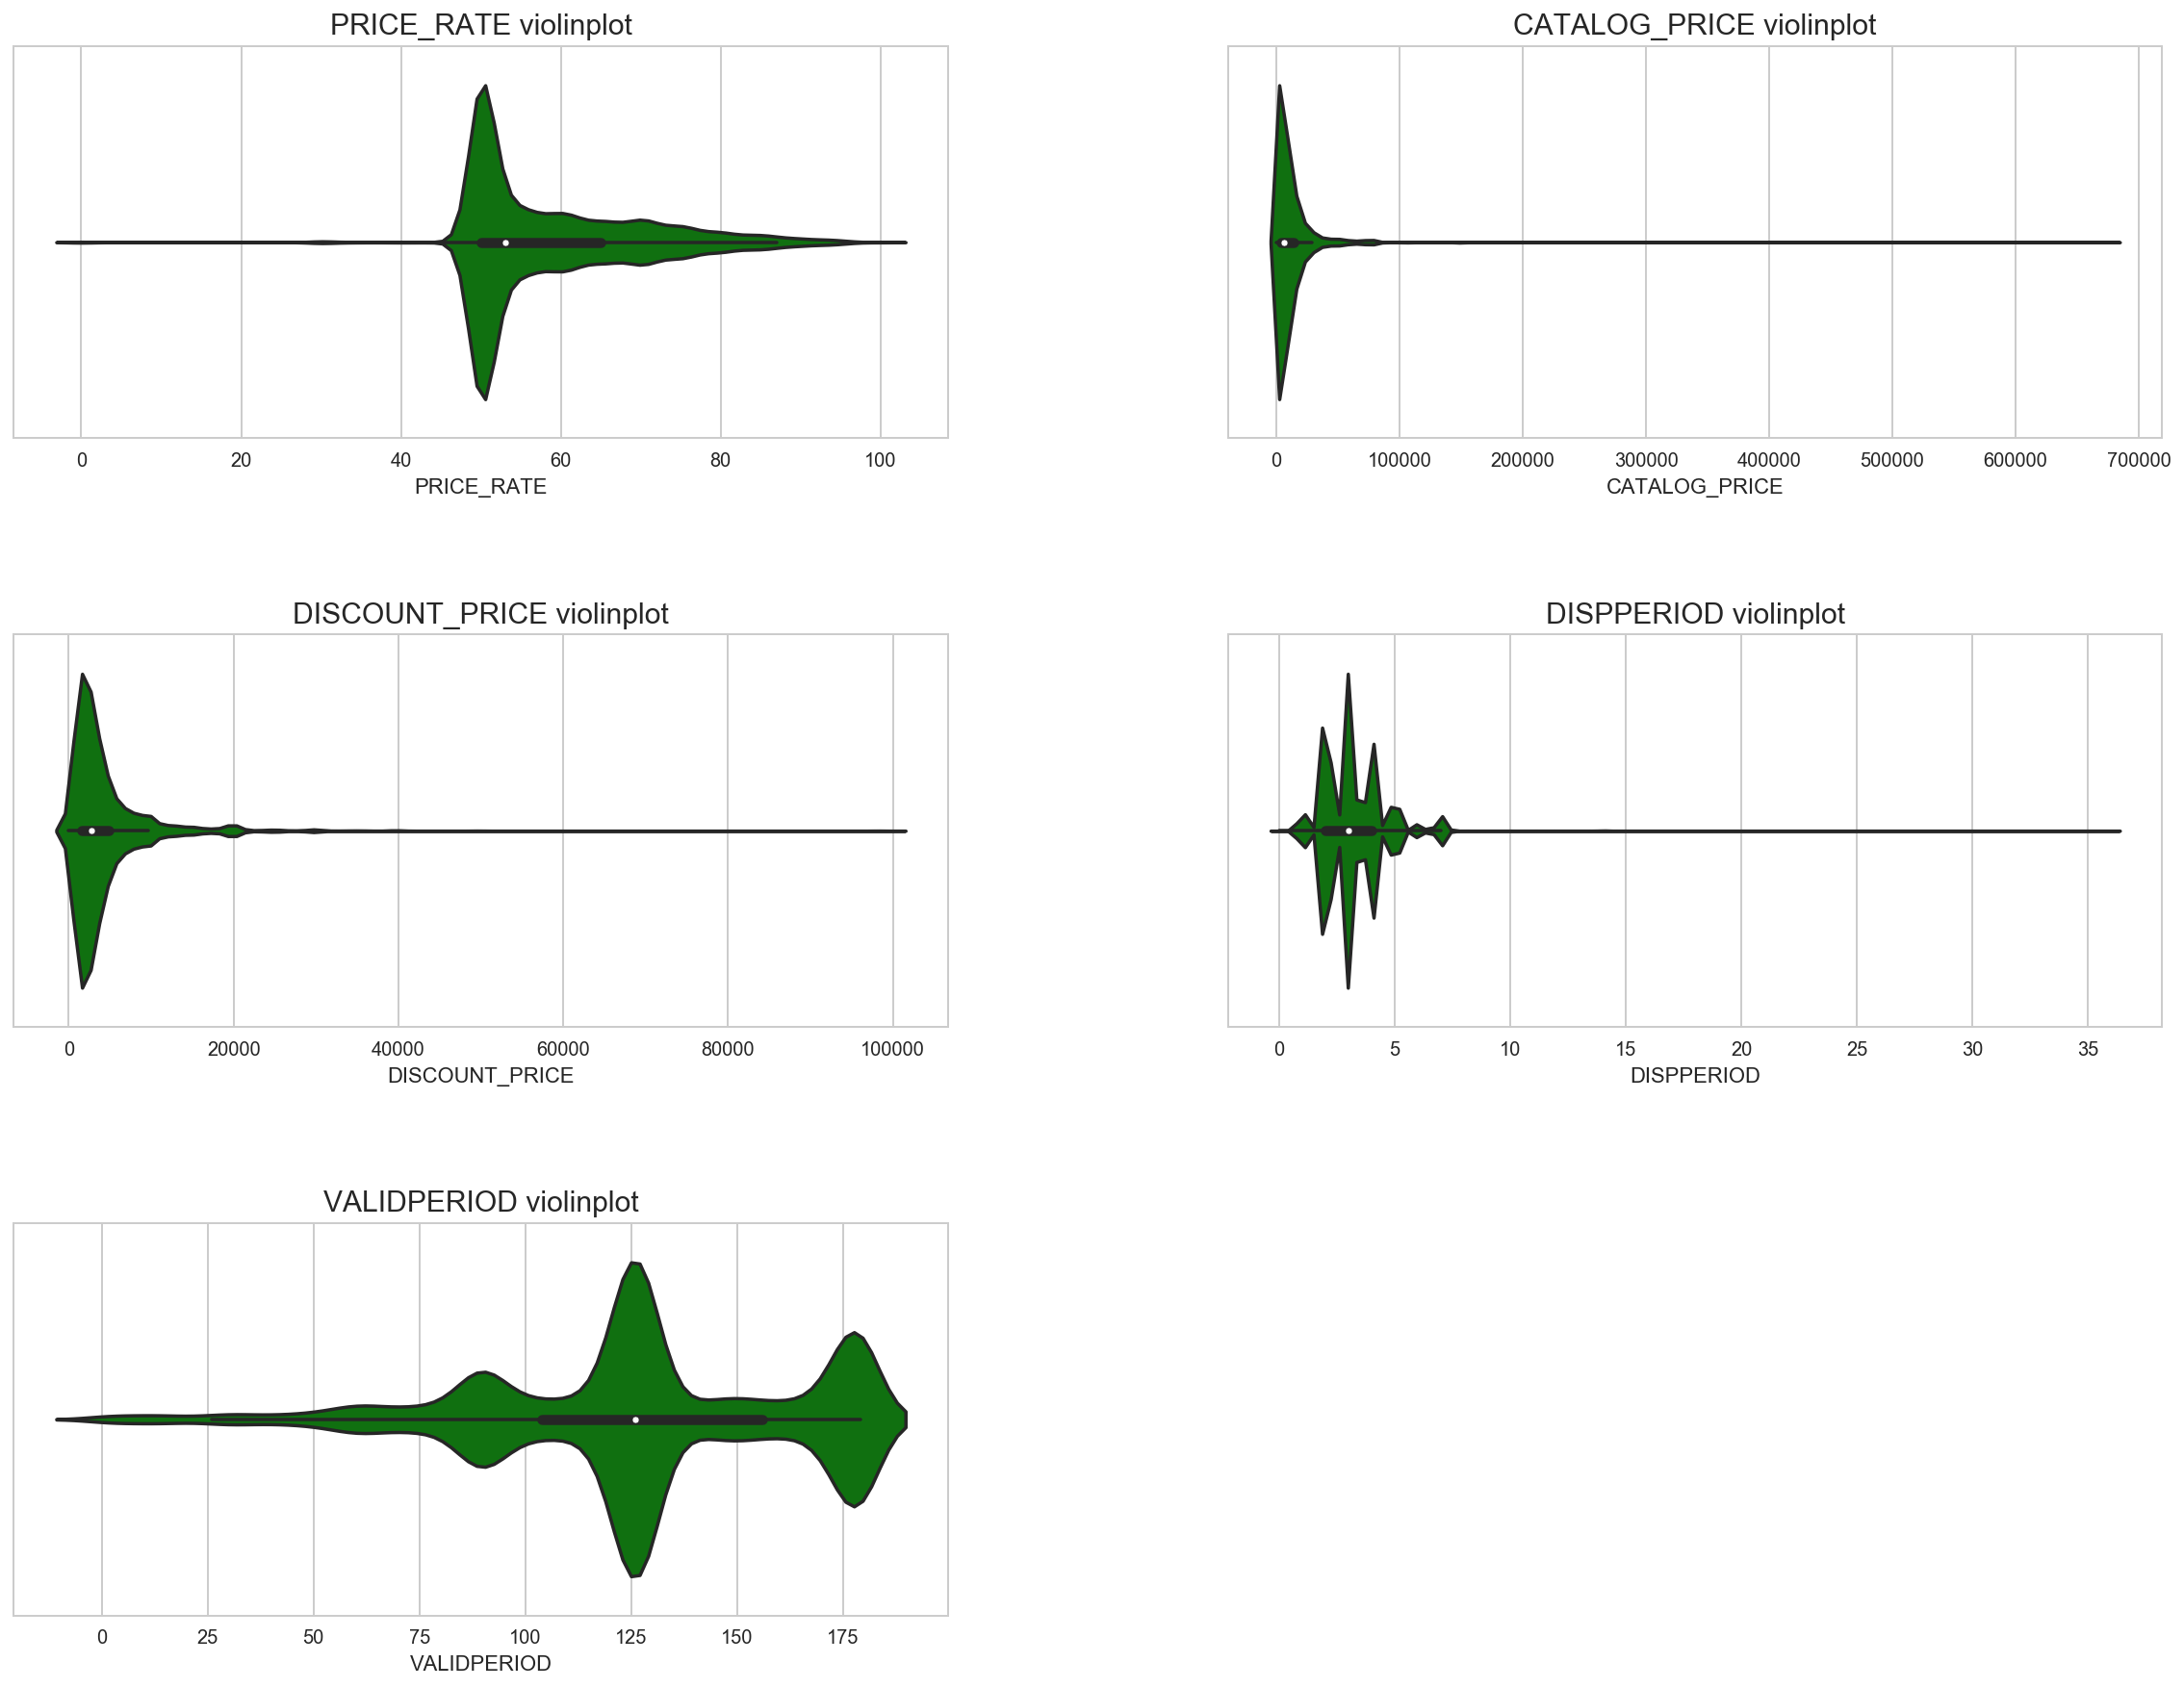

In [23]:
# USABLE_DATE violinplot
plt.figure(figsize=(20, 15))
plt.subplots_adjust(hspace = 0.5, wspace = 0.3)

for i in range(14, 18+1):
    plt.subplot(3,2,i-13)
    sns.violinplot(x = train.columns[i], data = train, color = 'green')
    plt.title("{} violinplot".format(train.columns[i]), fontsize = 15)

plt.show()

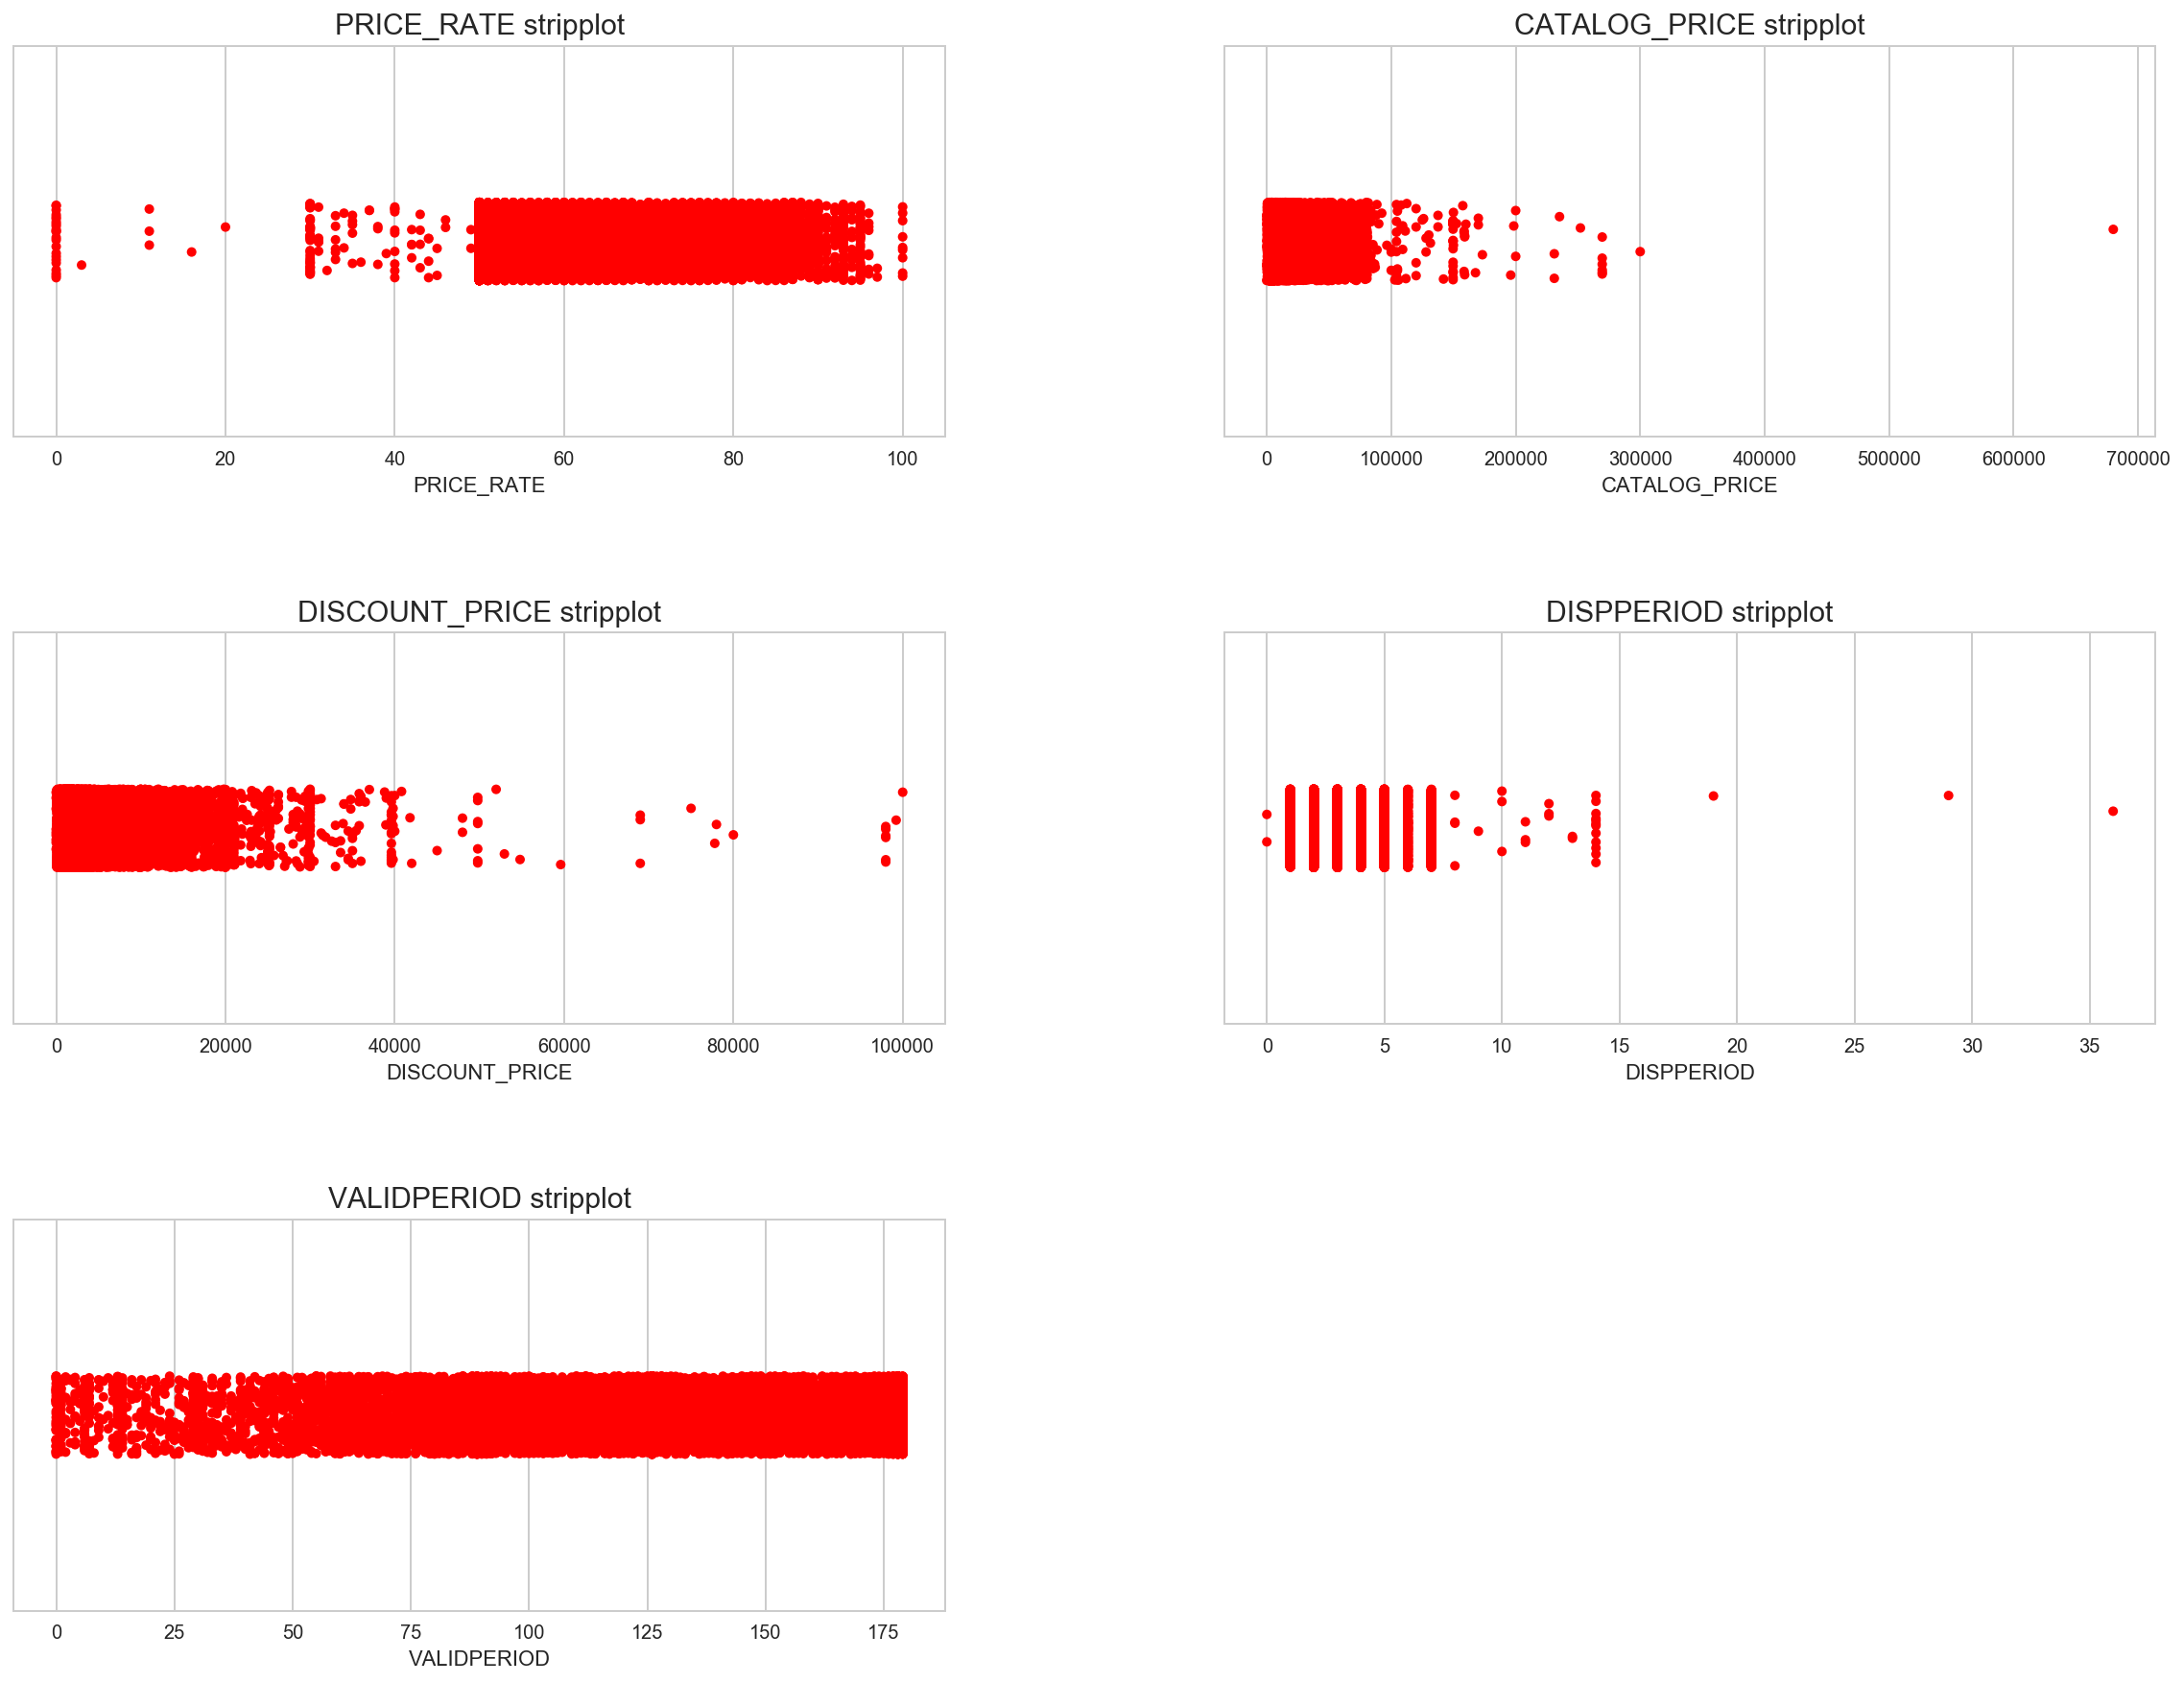

In [24]:
# USABLE_DATE stripplot
plt.figure(figsize=(20, 15))
plt.subplots_adjust(hspace = 0.5, wspace = 0.3)

for i in range(14, 18+1):
    plt.subplot(3,2,i-13)
    sns.stripplot(x = train.columns[i], data = train, color = 'red', jitter = True)
    plt.title("{} stripplot".format(train.columns[i]), fontsize = 15)

plt.show()

#### 3.3 Date

In [25]:
# DISPFROM
train['DISPFROM'] = pd.to_datetime(train['DISPFROM']) 
train['DISPFROM_year'] = train['DISPFROM'].dt.year 
train['DISPFROM_month'] = train['DISPFROM'].dt.month 
train['DISPFROM_weekday'] = train['DISPFROM'].dt.weekday # 요일 (0:월, 1:화, 2:수, 3:목, 4:금, 5:토, 6:일)
train['DISPFROM_hour'] = train['DISPFROM'].dt.hour

# test
test['DISPFROM'] = pd.to_datetime(test['DISPFROM']) 
test['DISPFROM_year'] = test['DISPFROM'].dt.year 
test['DISPFROM_month'] = test['DISPFROM'].dt.month 
test['DISPFROM_weekday'] = test['DISPFROM'].dt.weekday 
test['DISPFROM_hour'] = test['DISPFROM'].dt.hour

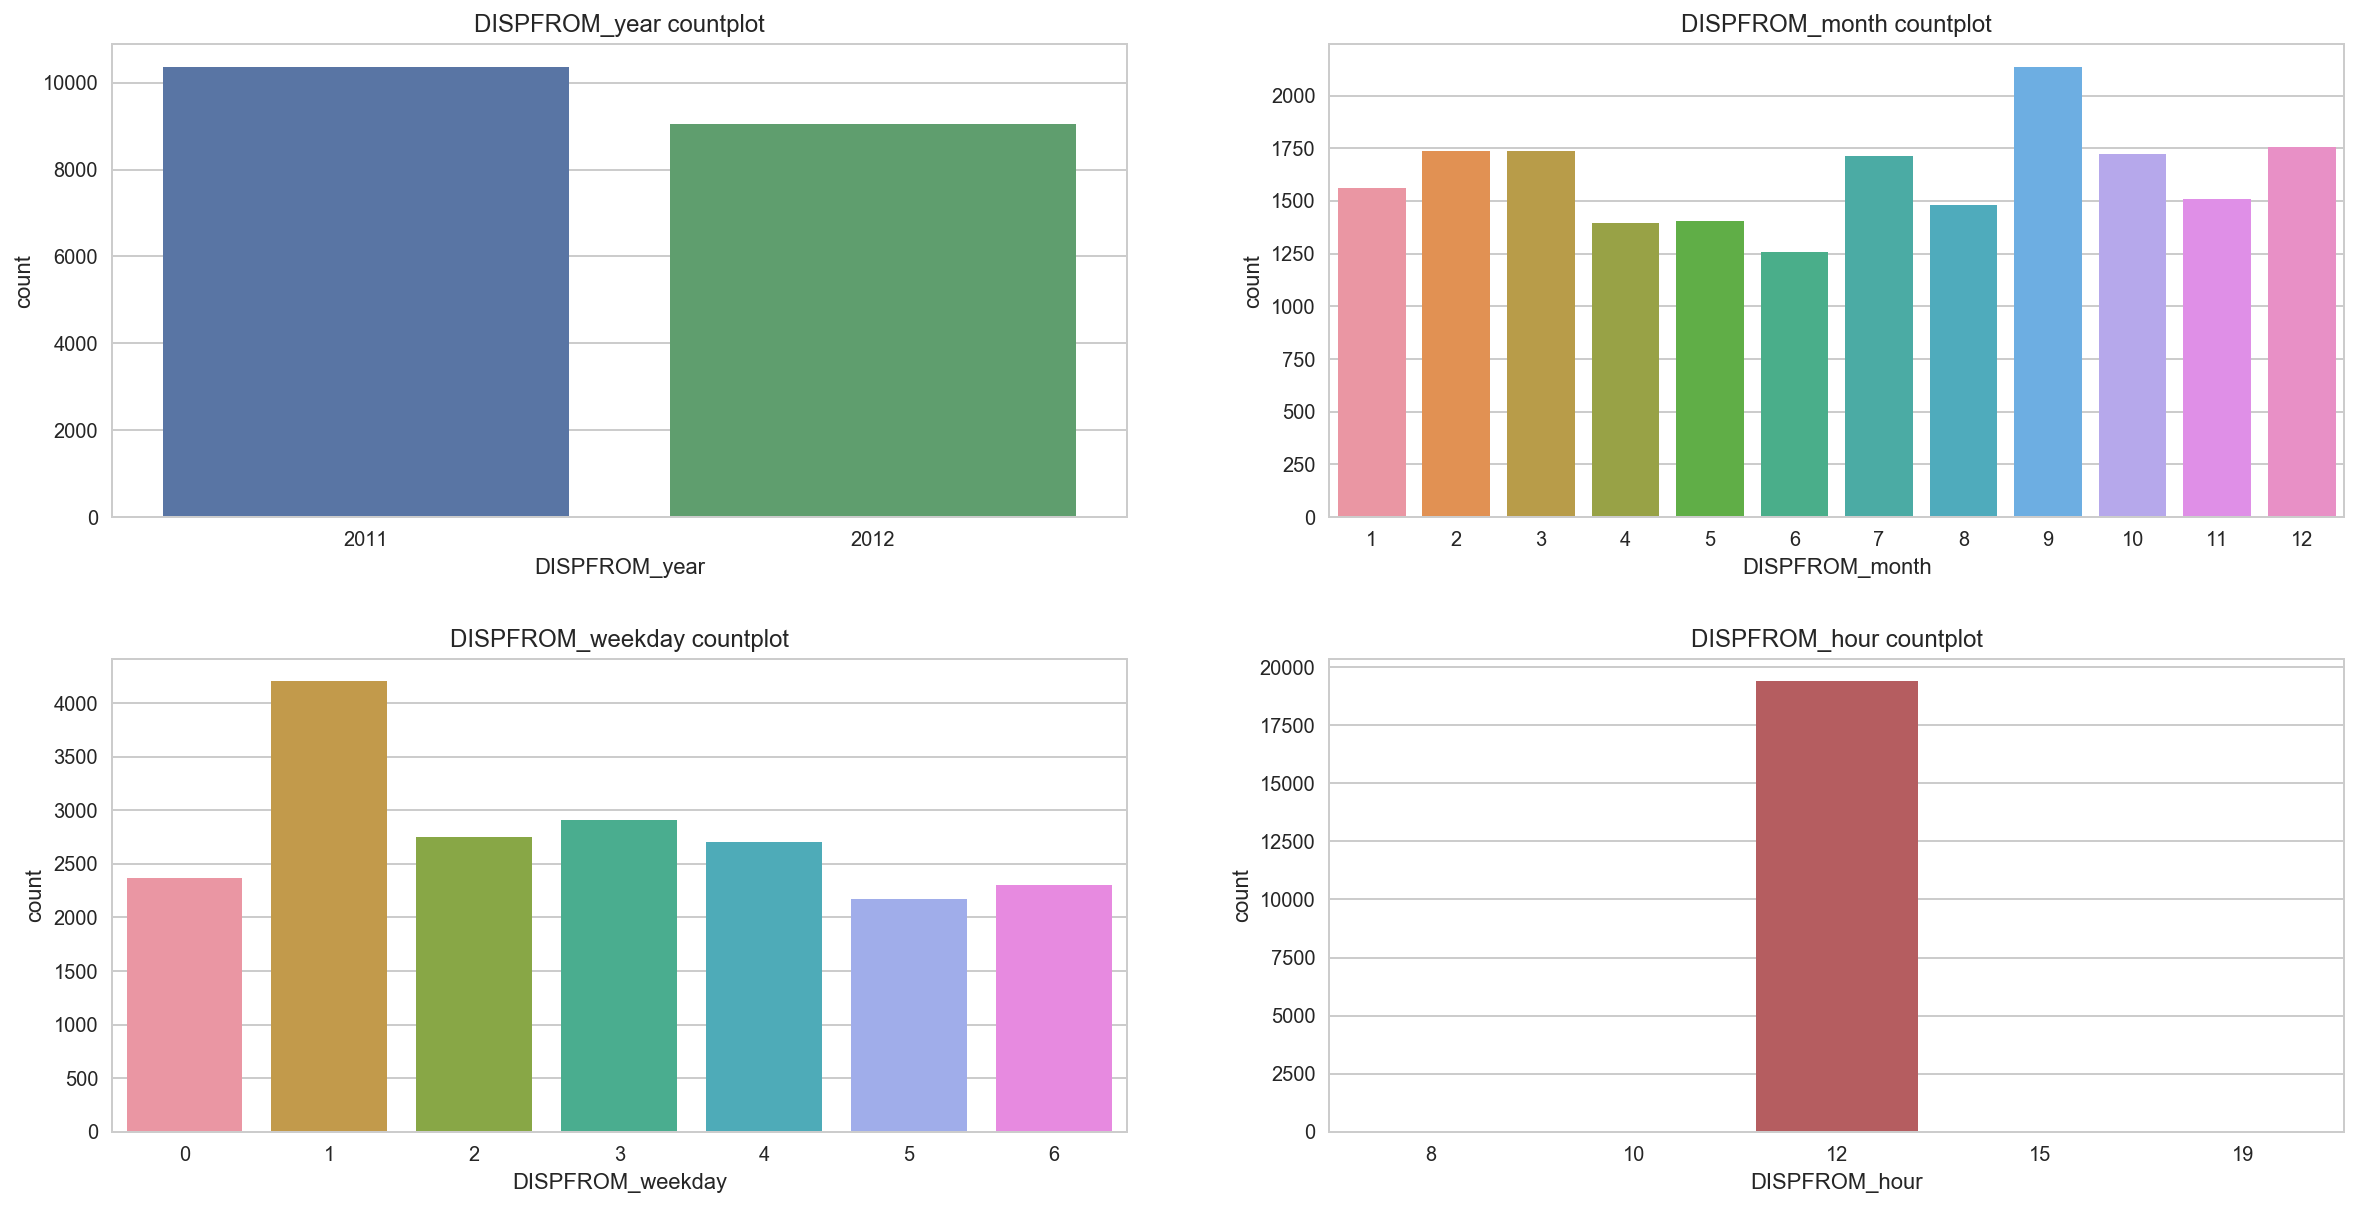

In [26]:
# feature countplot
plt.figure(figsize=(20, 10))
subplots_adjust(hspace = 0.3)

for i in range(22, 25+1):
    plt.subplot(2, 2, i-21)
    sns.countplot(x = train[train.columns[i]], data = train)
    plt.title('{} countplot'.format(train.columns[i]))

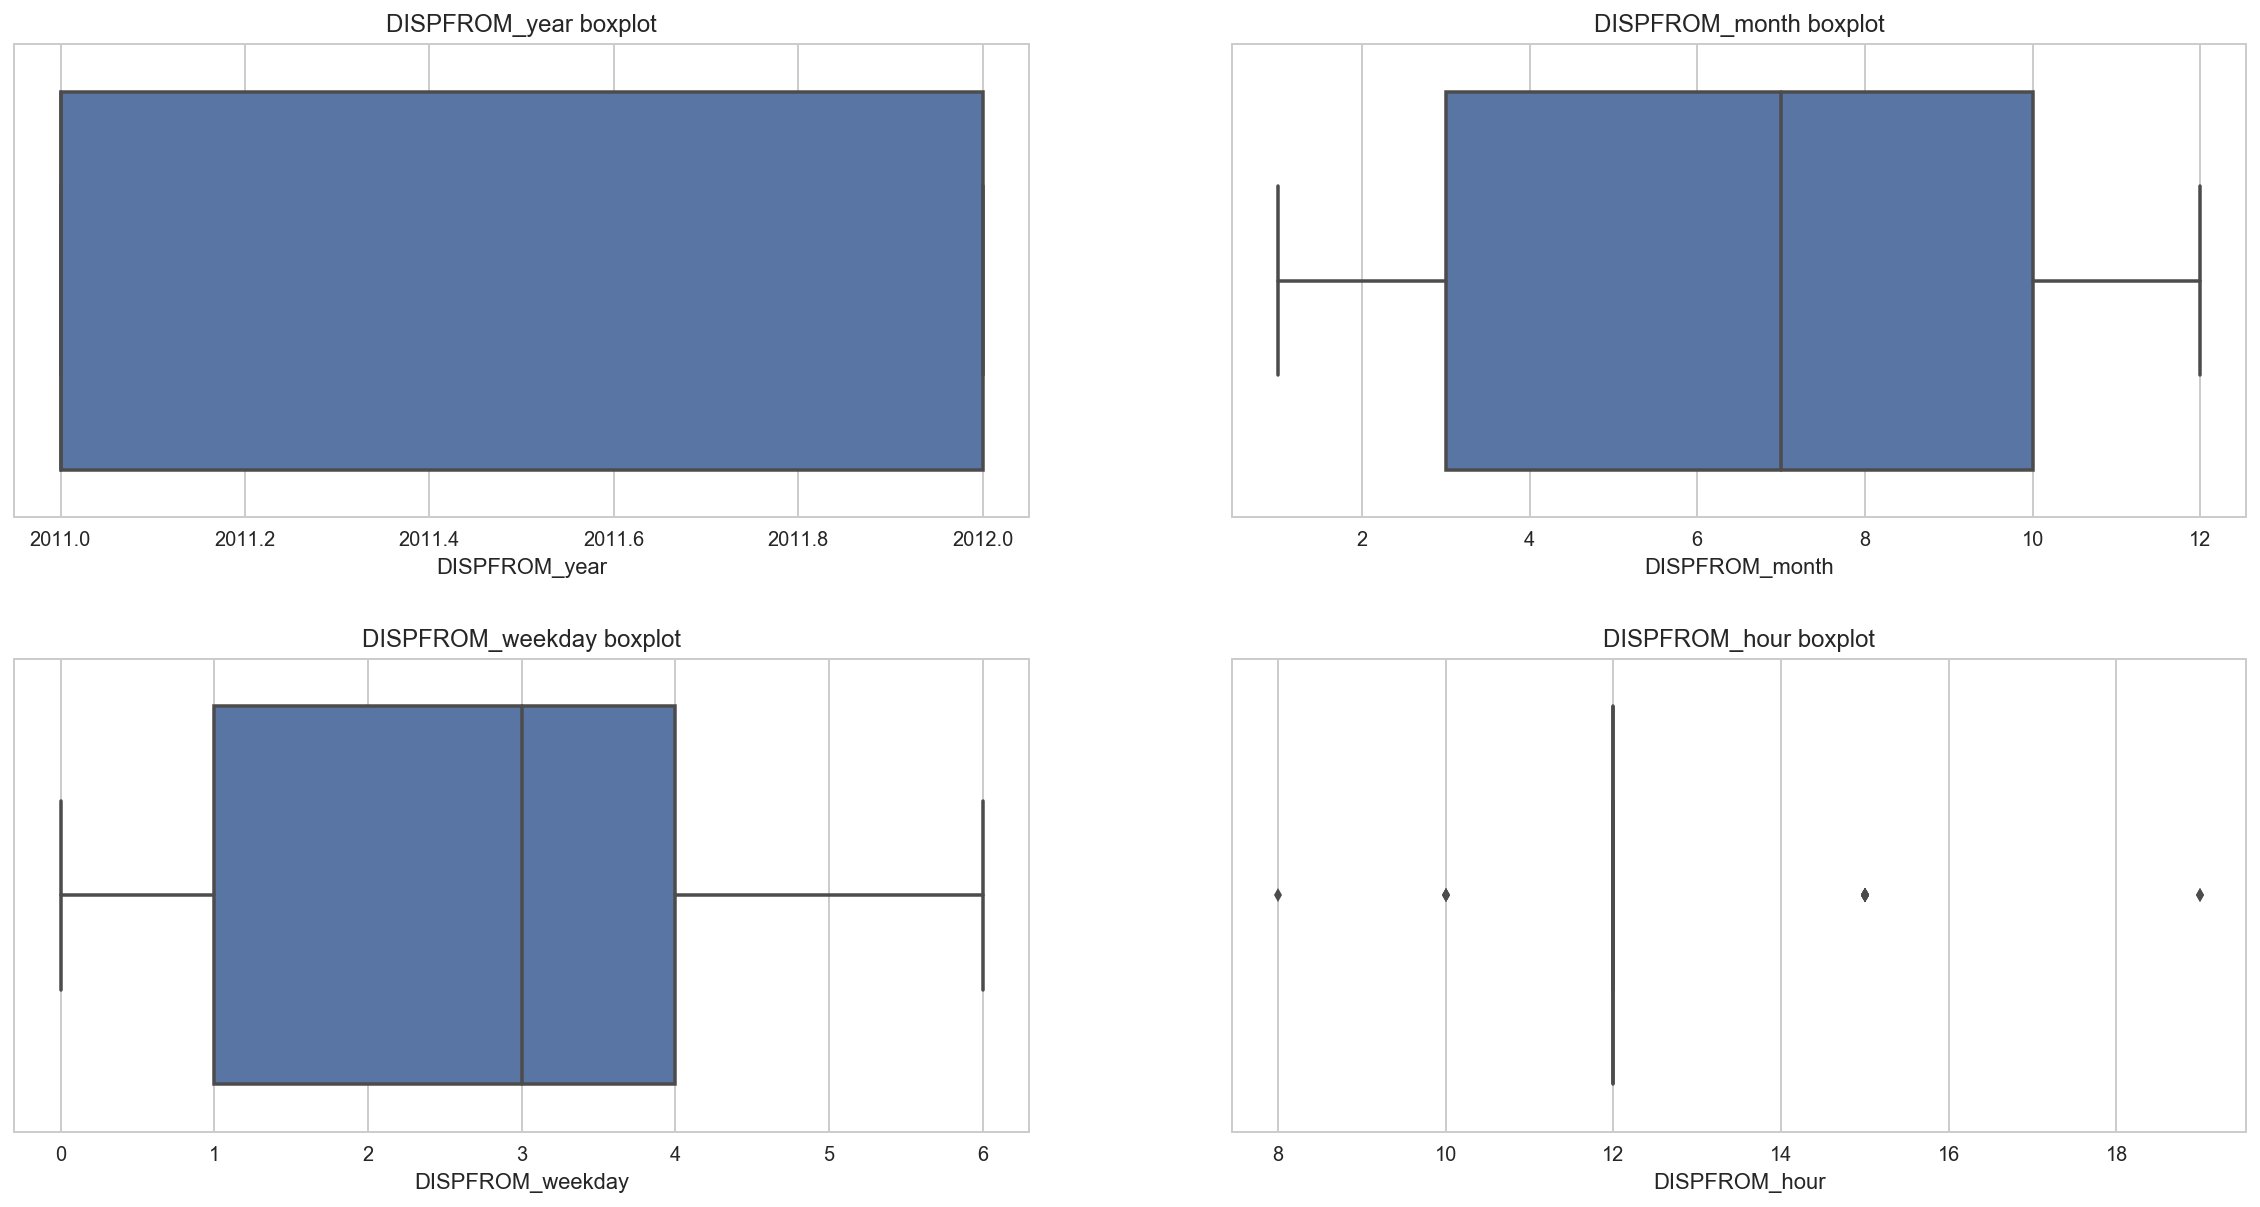

In [27]:
# feature boxplot
plt.figure(figsize=(20, 10))
subplots_adjust(hspace = 0.3)

for i in range(22, 25+1):
    plt.subplot(2, 2, i-21)
    sns.boxplot(x = train[train.columns[i]], data = train)
    plt.title('{} boxplot'.format(train.columns[i]))

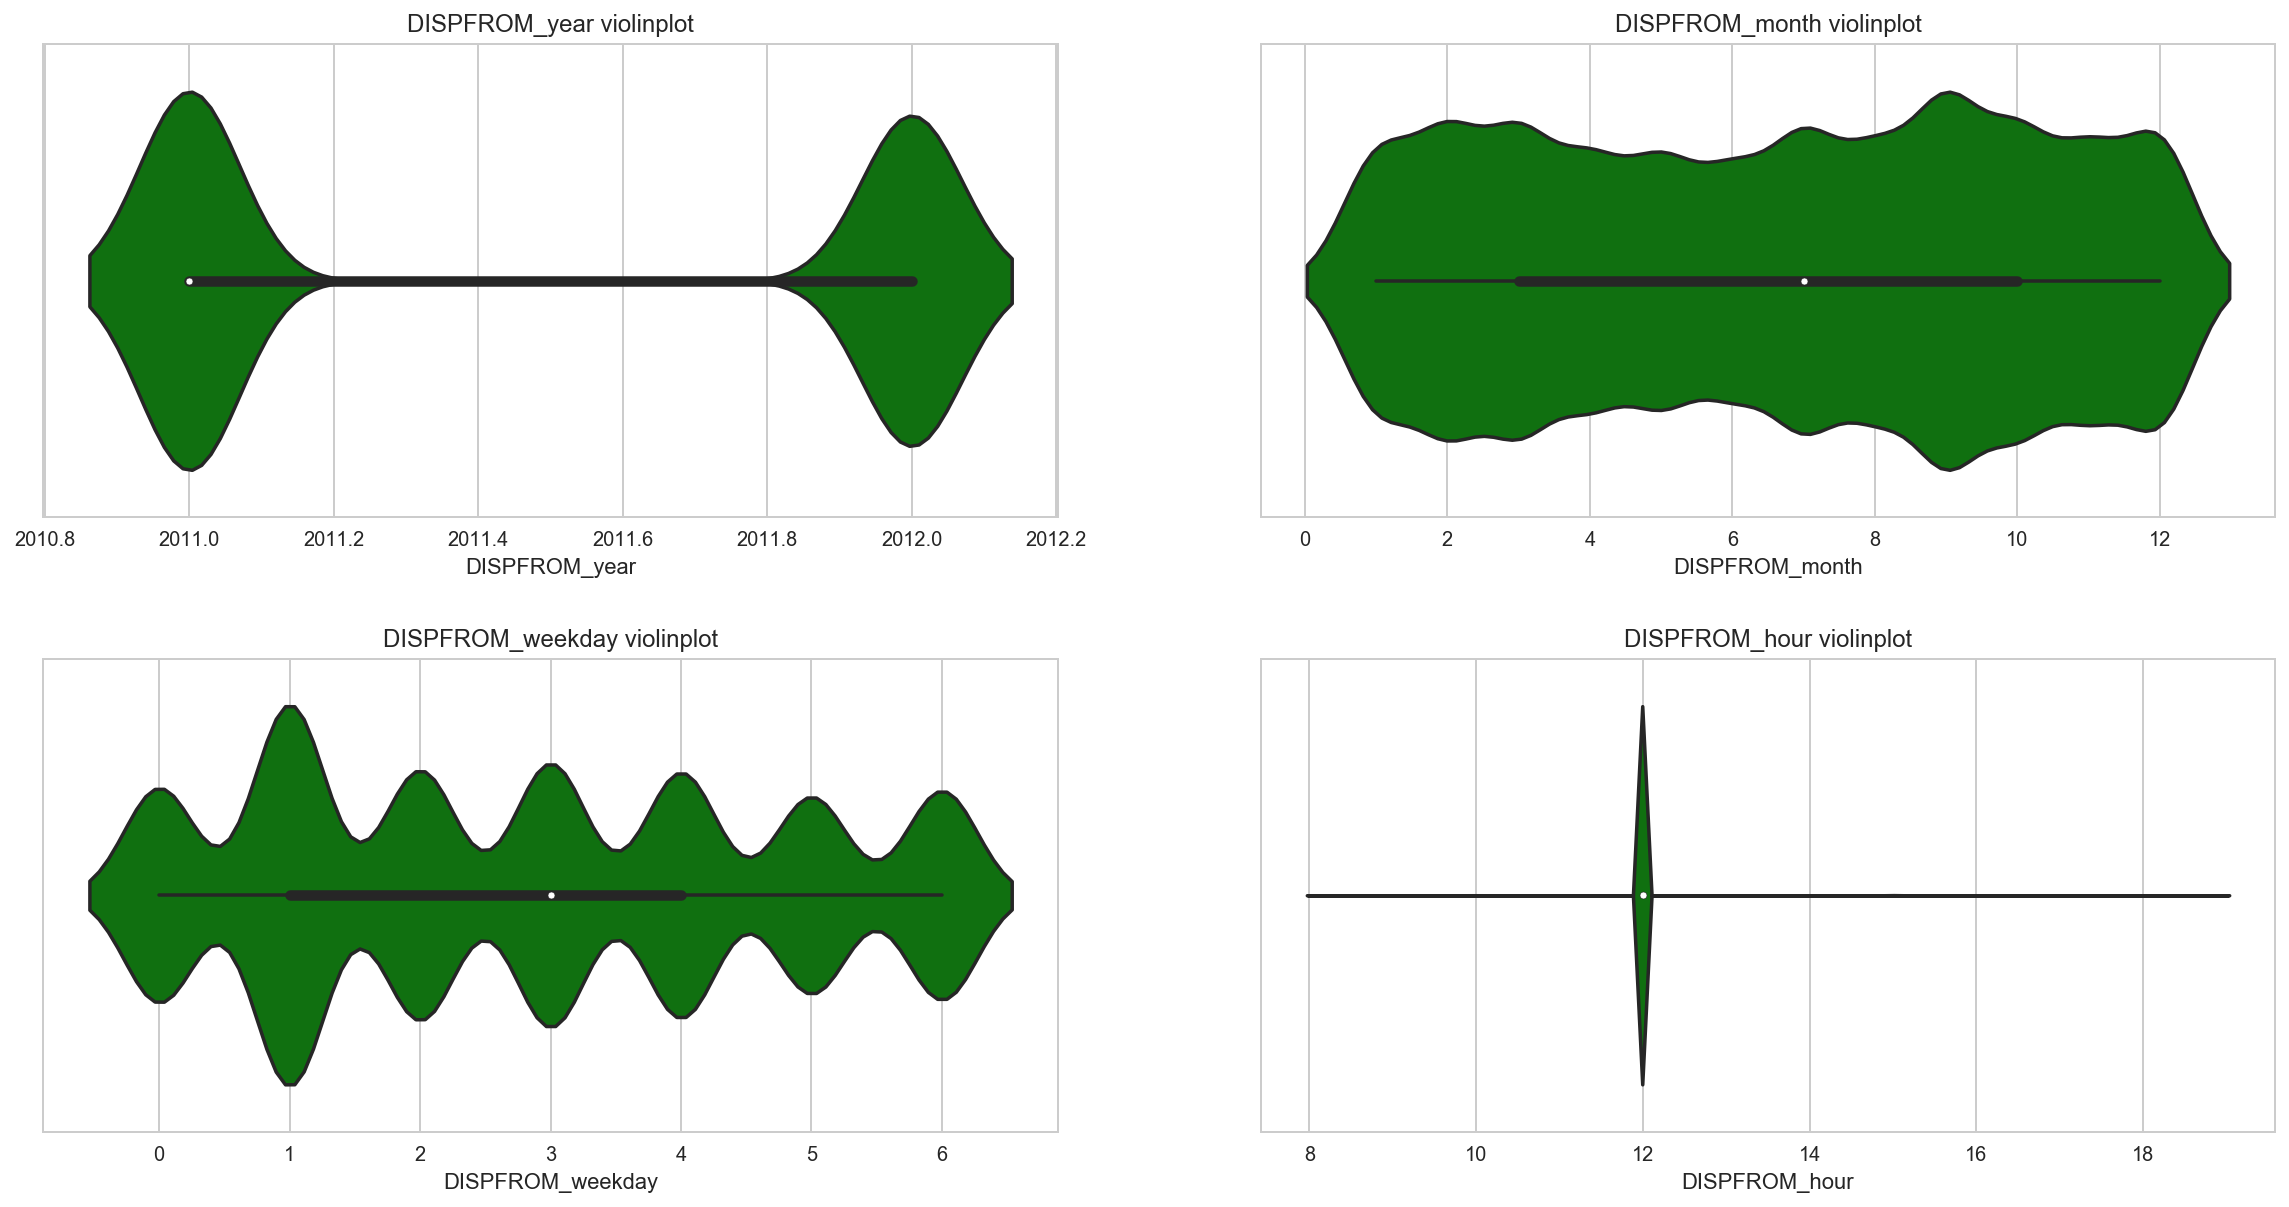

In [28]:
# feature violinplot
plt.figure(figsize=(20, 10))
subplots_adjust(hspace = 0.3)

for i in range(22, 25+1):
    plt.subplot(2, 2, i-21)
    sns.violinplot(x = train[train.columns[i]], color = 'green', data = train)
    plt.title('{} violinplot'.format(train.columns[i]))

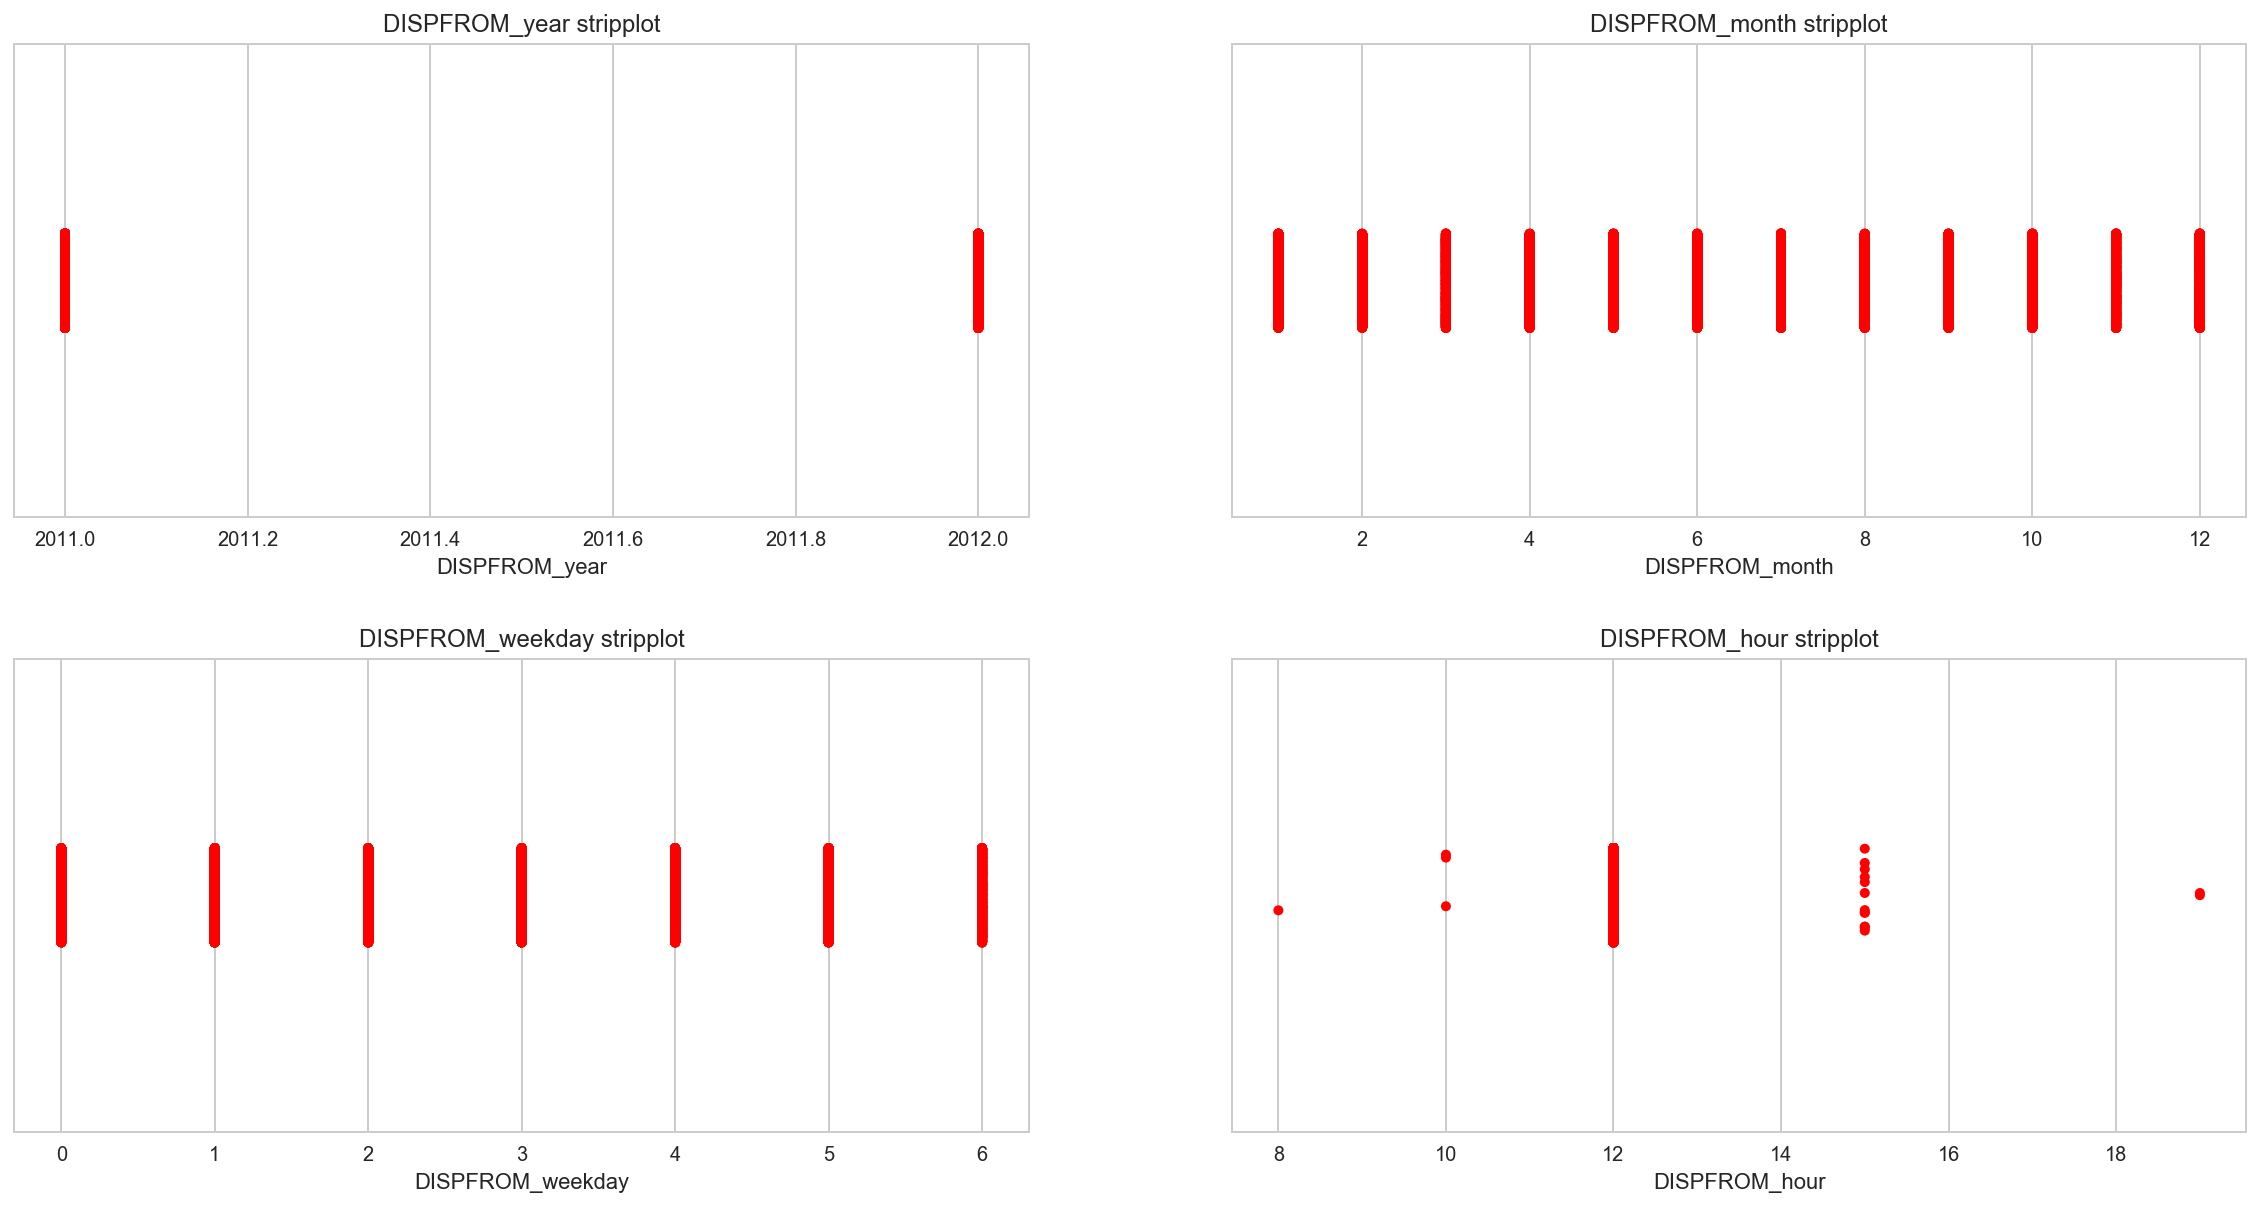

In [29]:
# feature stripplot
plt.figure(figsize=(20, 10))
subplots_adjust(hspace = 0.3)

for i in range(22, 25+1):
    plt.subplot(2, 2, i-21)
    sns.stripplot(x = train[train.columns[i]], data = train, color = 'red', jitter = True)
    plt.title('{} stripplot'.format(train.columns[i]))

In [10]:

# test
test['DISPEND'] = pd.to_datetime(test['DISPEND']) 
test['DISPEND_year'] = test['DISPEND'].dt.year 
test['DISPEND_month'] = test['DISPEND'].dt.month 
test['DISPEND_weekday'] = test['DISPEND'].dt.weekday
test['DISPEND_hour'] = test['DISPEND'].dt.hour

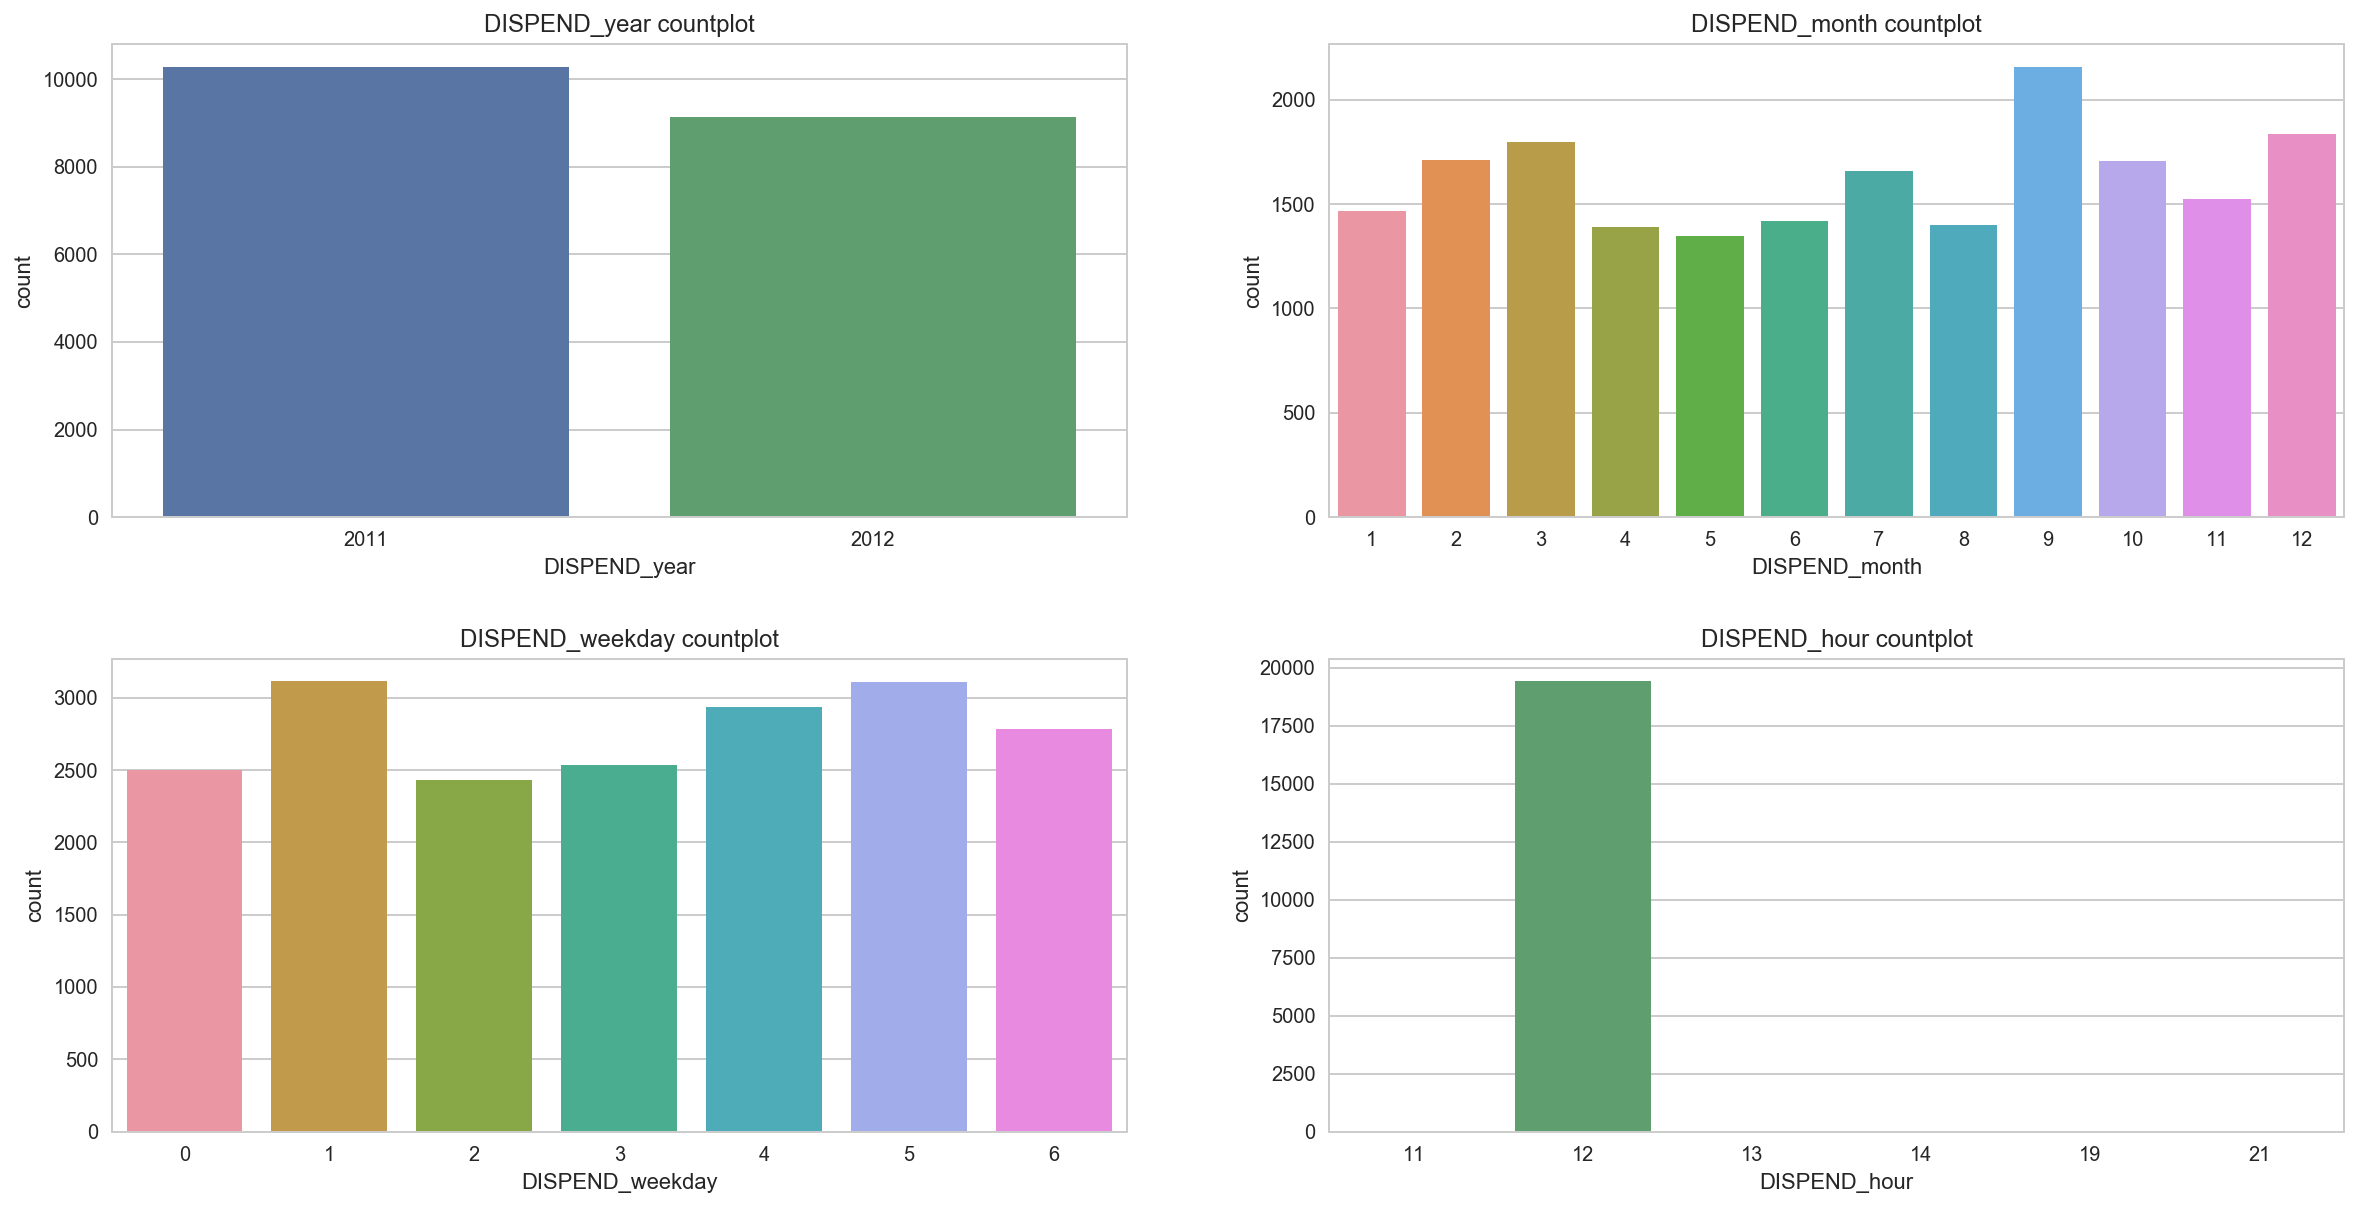

In [31]:
# feature countplot
plt.figure(figsize=(20, 10))
subplots_adjust(hspace = 0.3)

for i in range(26, 29+1):
    plt.subplot(2, 2, i-25)
    sns.countplot(x = train[train.columns[i]], data = train)
    plt.title('{} countplot'.format(train.columns[i]))

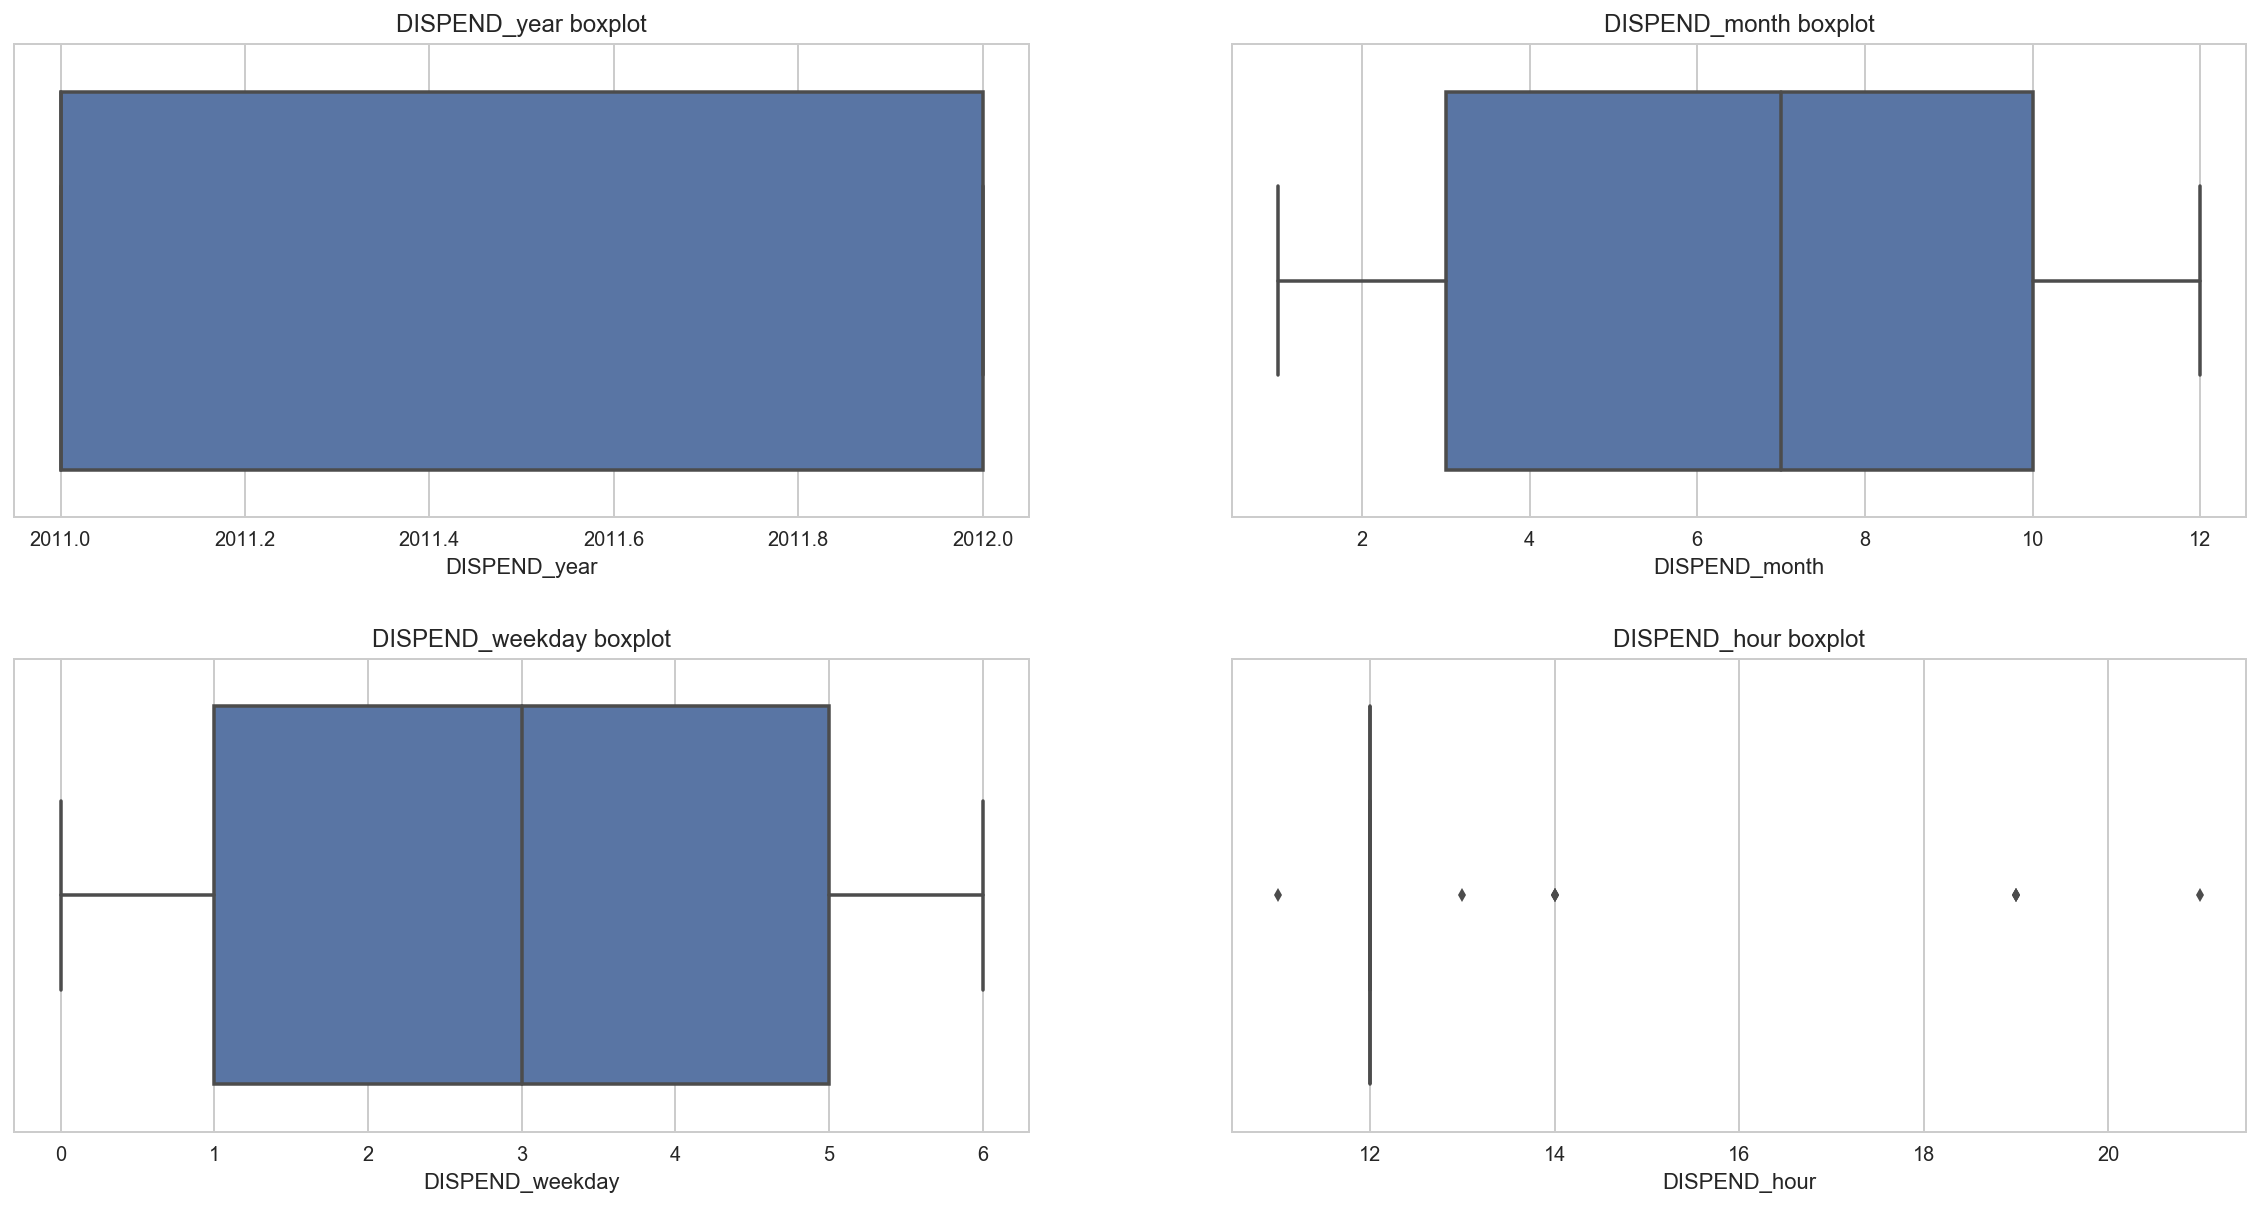

In [32]:
# feature boxplot
plt.figure(figsize=(20, 10))
subplots_adjust(hspace = 0.3)

for i in range(26, 29+1):
    plt.subplot(2, 2, i-25)
    sns.boxplot(x = train[train.columns[i]], data = train)
    plt.title('{} boxplot'.format(train.columns[i]))

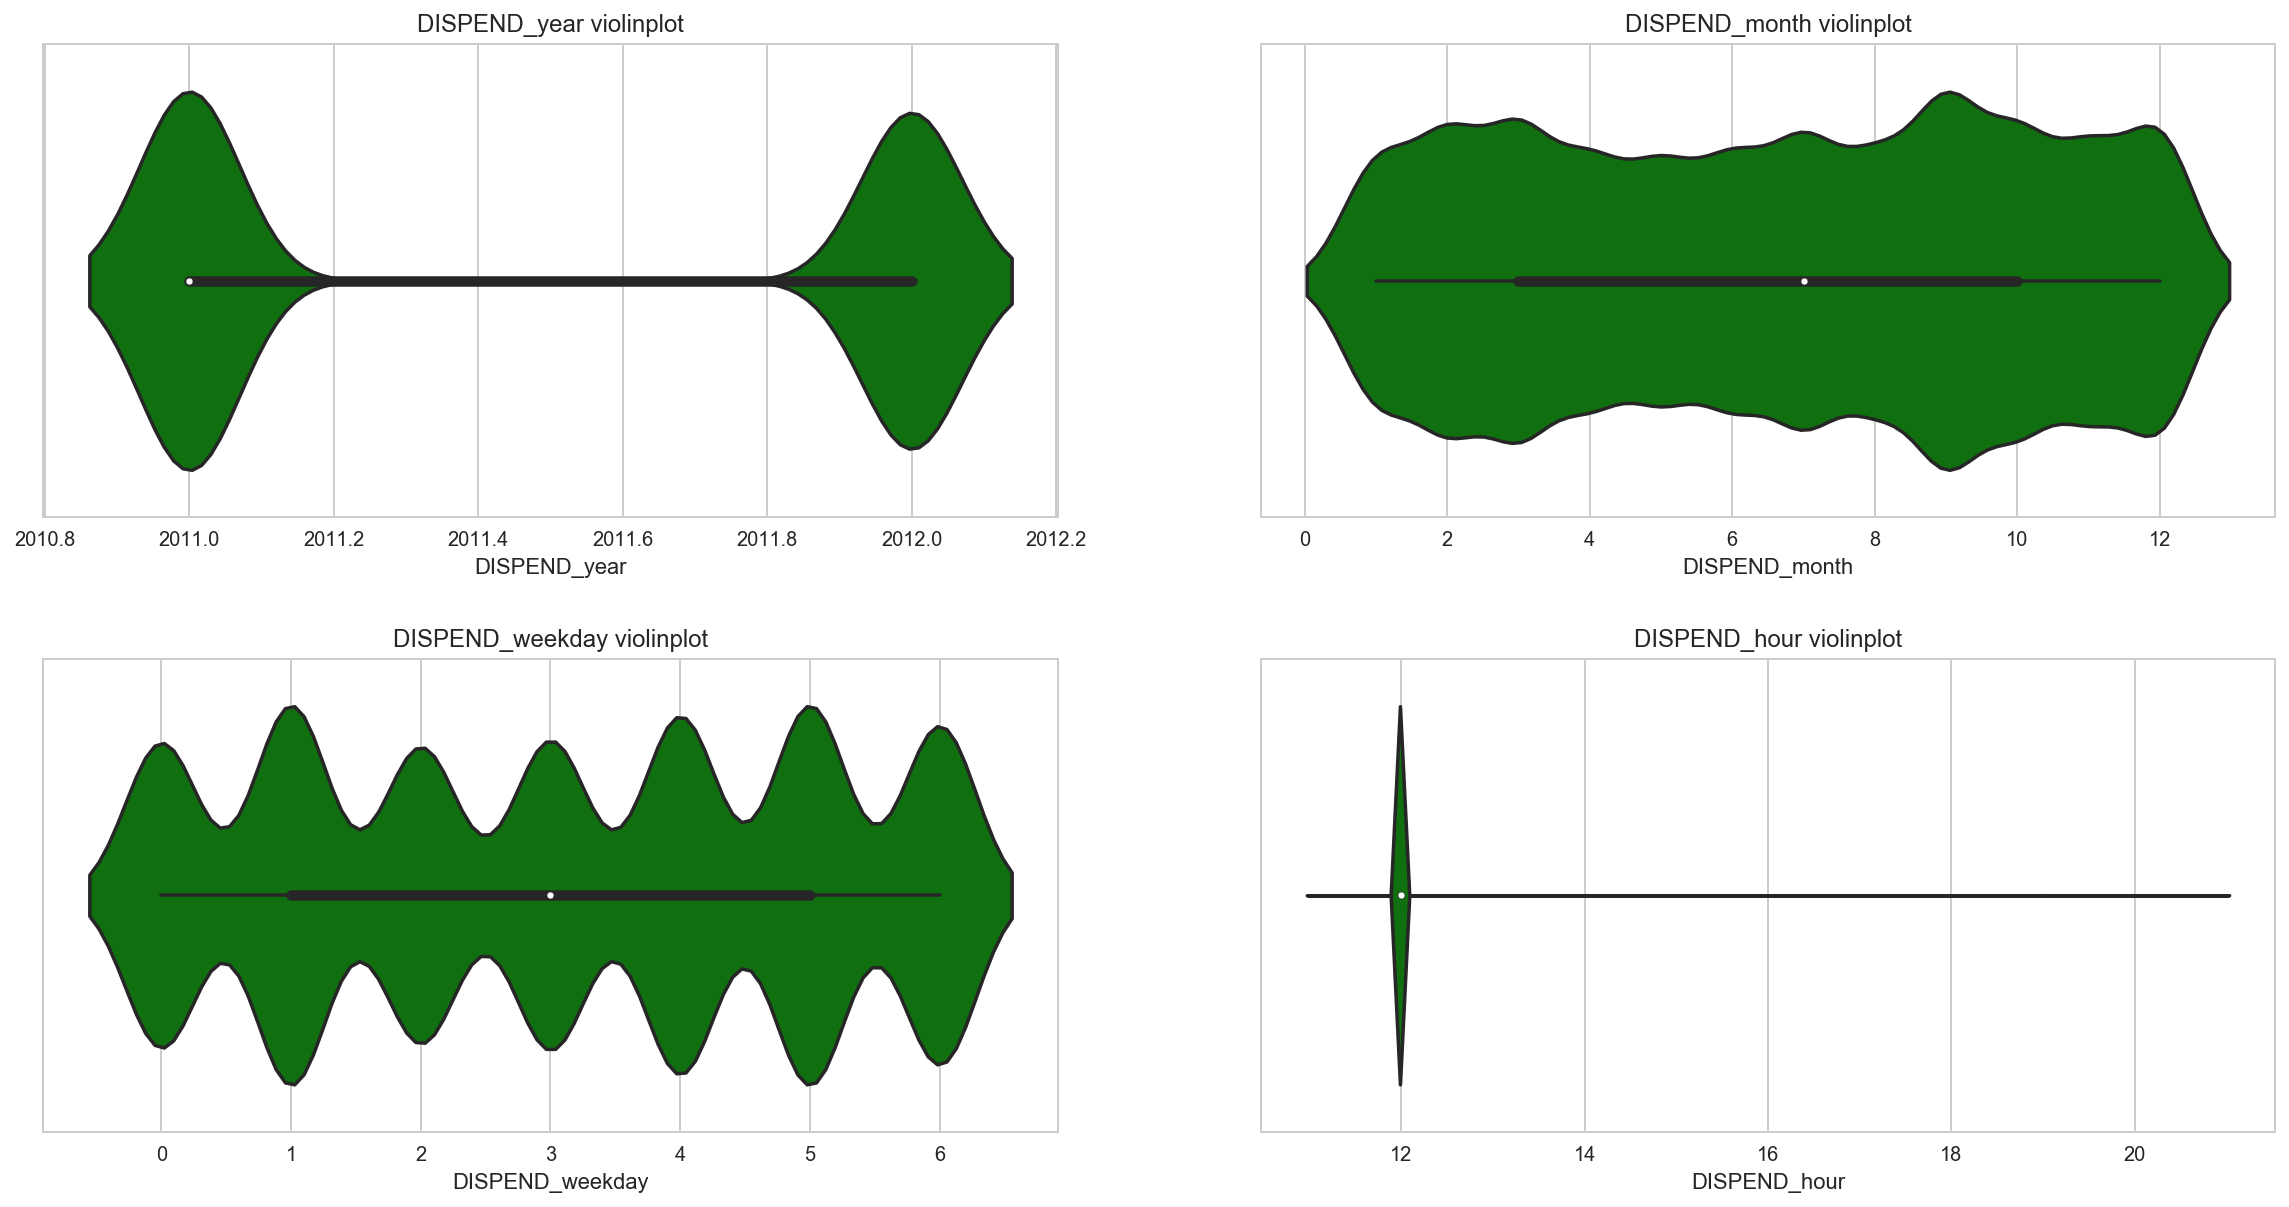

In [33]:
# feature violinplot
plt.figure(figsize=(20, 10))
subplots_adjust(hspace = 0.3)

for i in range(26, 29+1):
    plt.subplot(2, 2, i-25)
    sns.violinplot(x = train[train.columns[i]], color = 'green', data = train)
    plt.title('{} violinplot'.format(train.columns[i]))

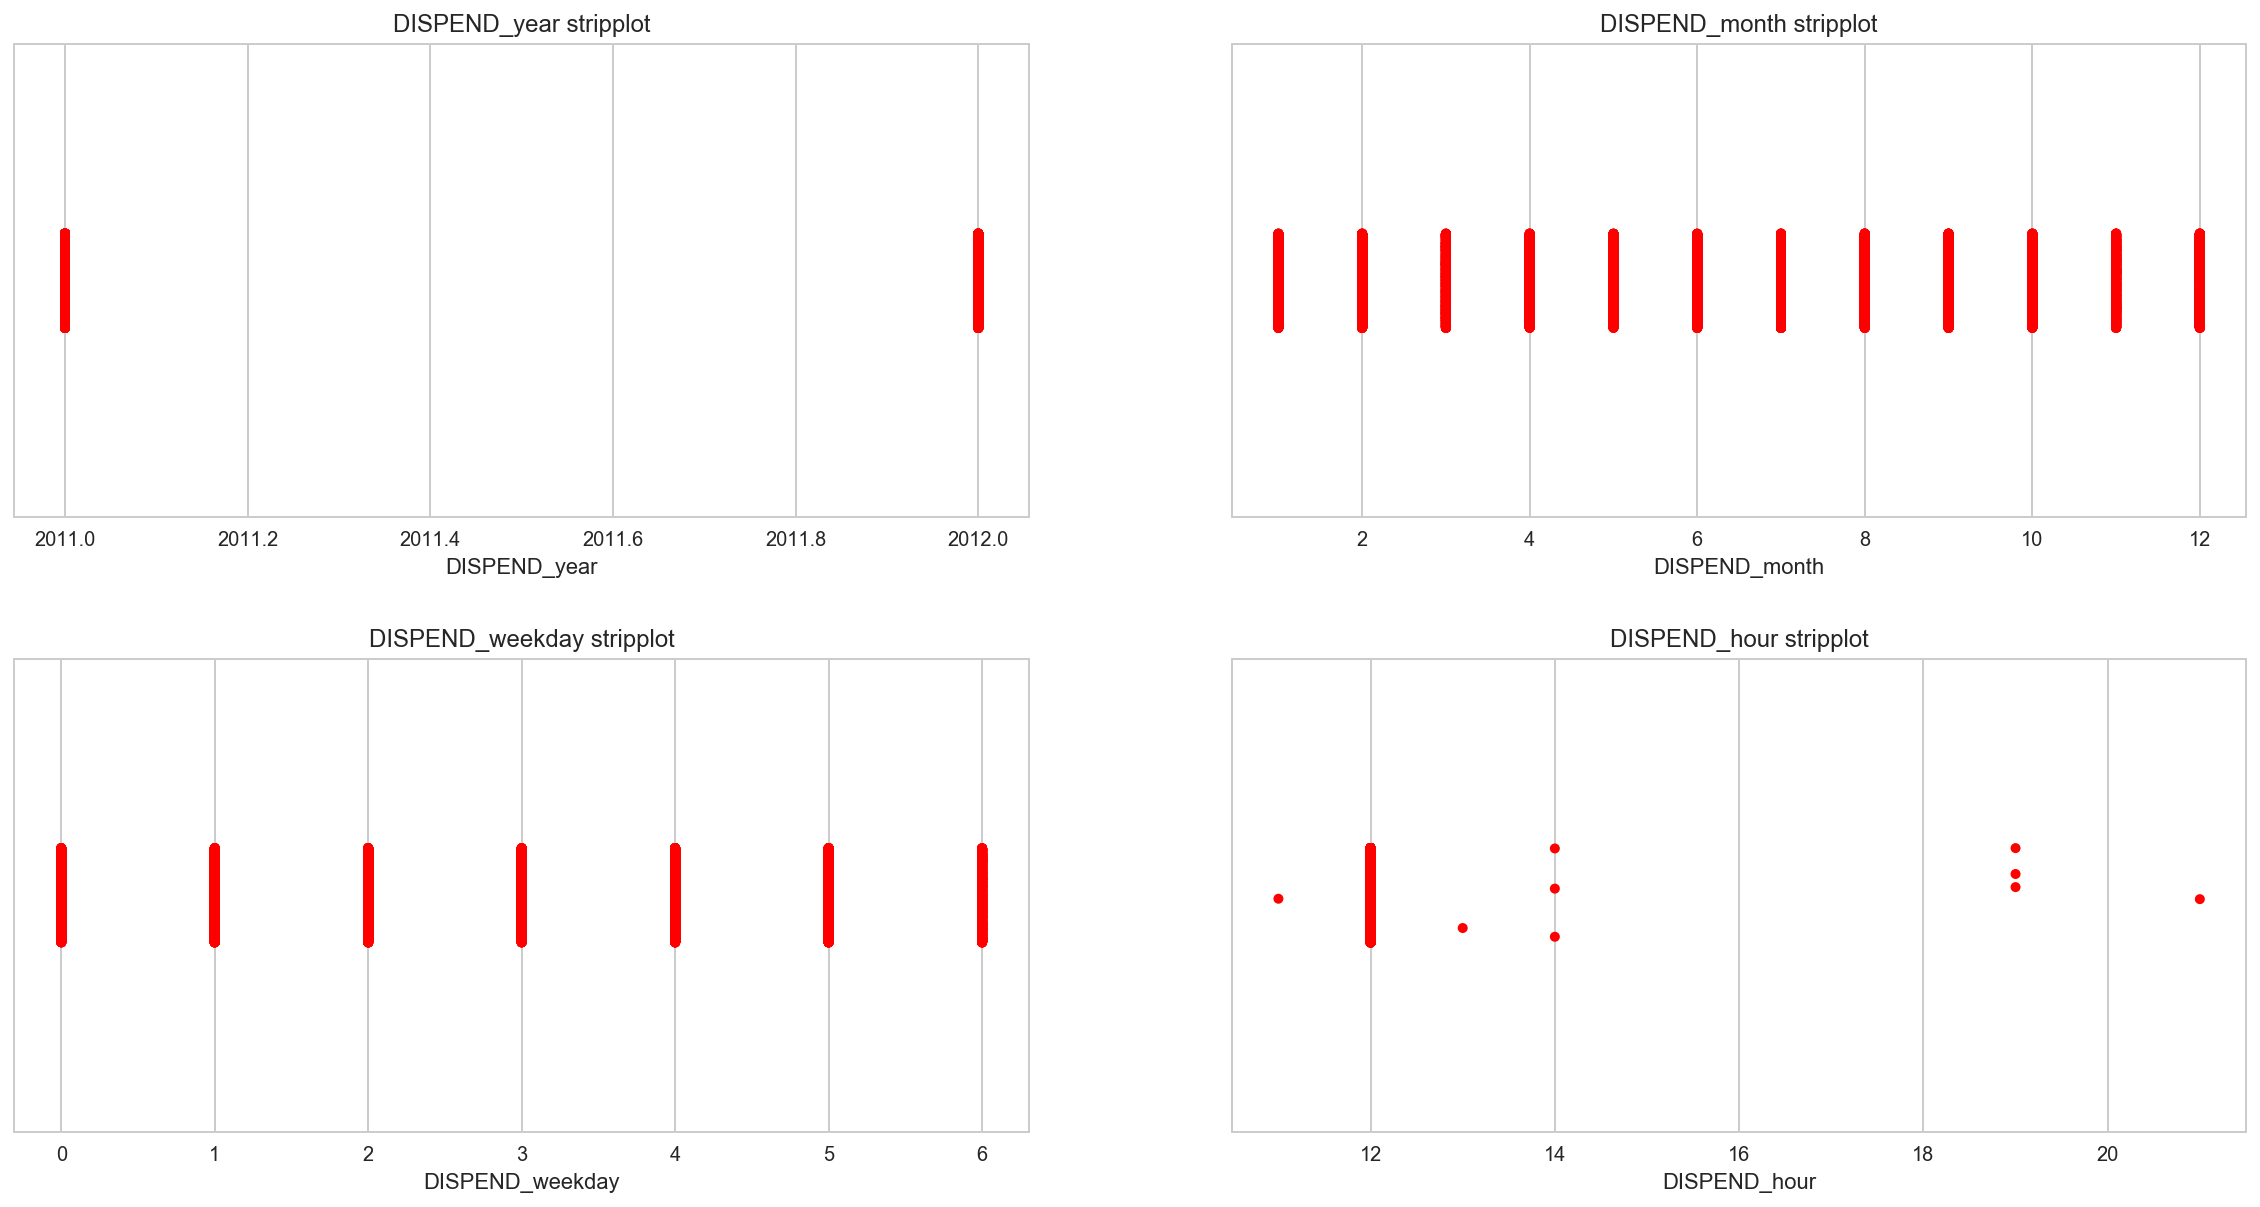

In [34]:
# feature stripplot
plt.figure(figsize=(20, 10))
subplots_adjust(hspace = 0.3)

for i in range(26, 29+1):
    plt.subplot(2, 2, i-25)
    sns.stripplot(x = train[train.columns[i]], data = train, color = 'red', jitter = True)
    plt.title('{} stripplot'.format(train.columns[i]))

#### 2.4 Coupon

In [ ]:
# COUPON_ID_hash Groupby
COUPON_ID = train.groupby("COUPON_ID_hash").size().reset_index(name='counts')
COUPON_ID = COUPON_ID.sort_values(by=['counts'], ascending=False)
COUPON_ID = COUPON_ID.reset_index(drop=True)
COUPON_ID.head(5)

In [11]:
# store csv
test.to_csv('data/coupon_list_test.csv', index = False)